### Data Preparation For Model Development using Data Refinery

#### The Data Refinery tool, available via Watson Studio and Watson Knowledge Catalog, saves data preparation time by quickly transforming large amounts of raw data into consumable, quality information that’s ready for analytics. In this step, one needs to explore the data and perform some level of data transformation as part of feature engineering. In order to get started, go to assets page in a new tab and follow the steps below:

### Step 1 -  Add Data refinery to the project by clicking on "Add to Project" on top of the project page

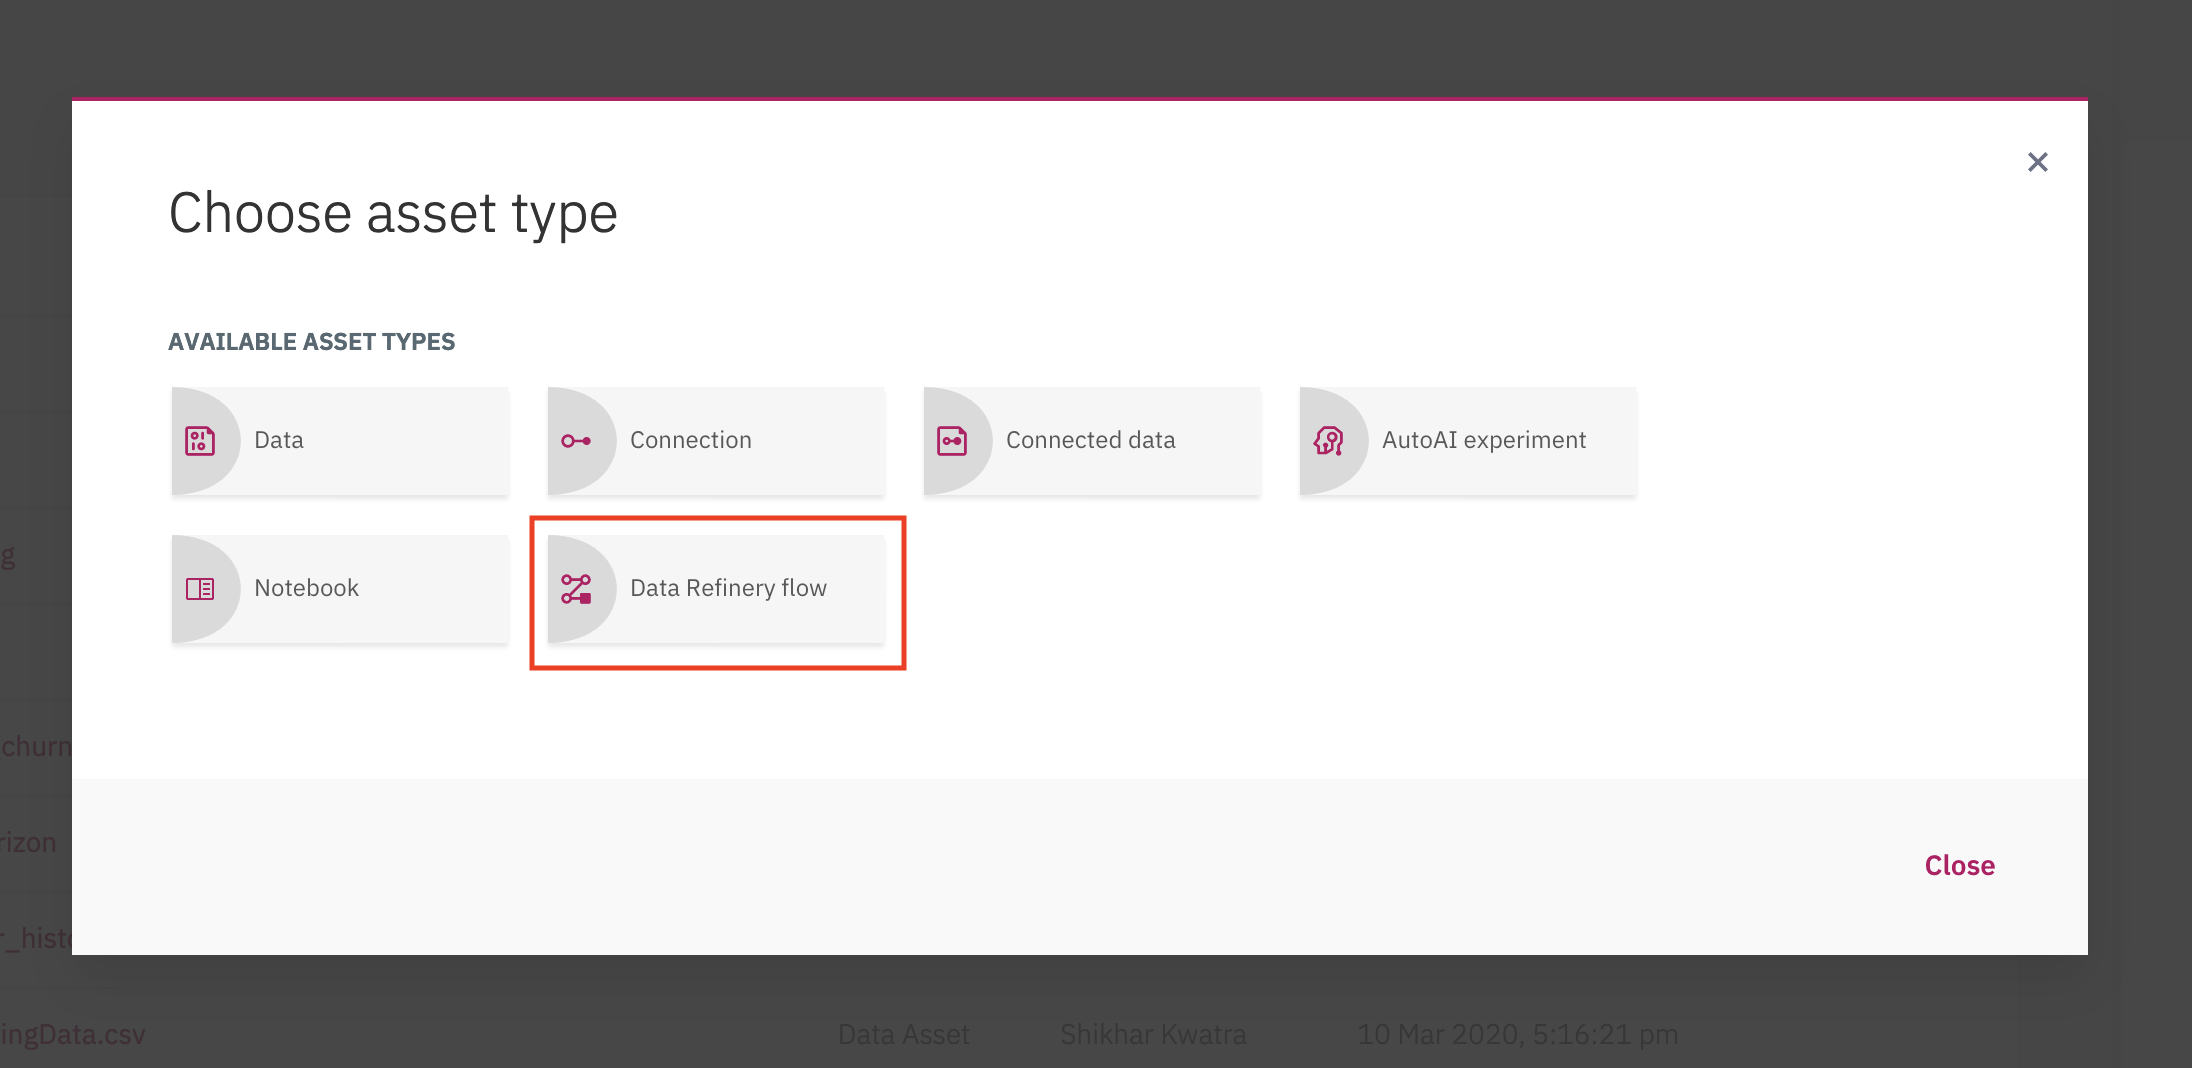

### Step 2 - Data Preparation

#### 2.a. This will show you the following page where you need to go to Data Assets and select "customer_usage_history.csv" file and click on "Add"

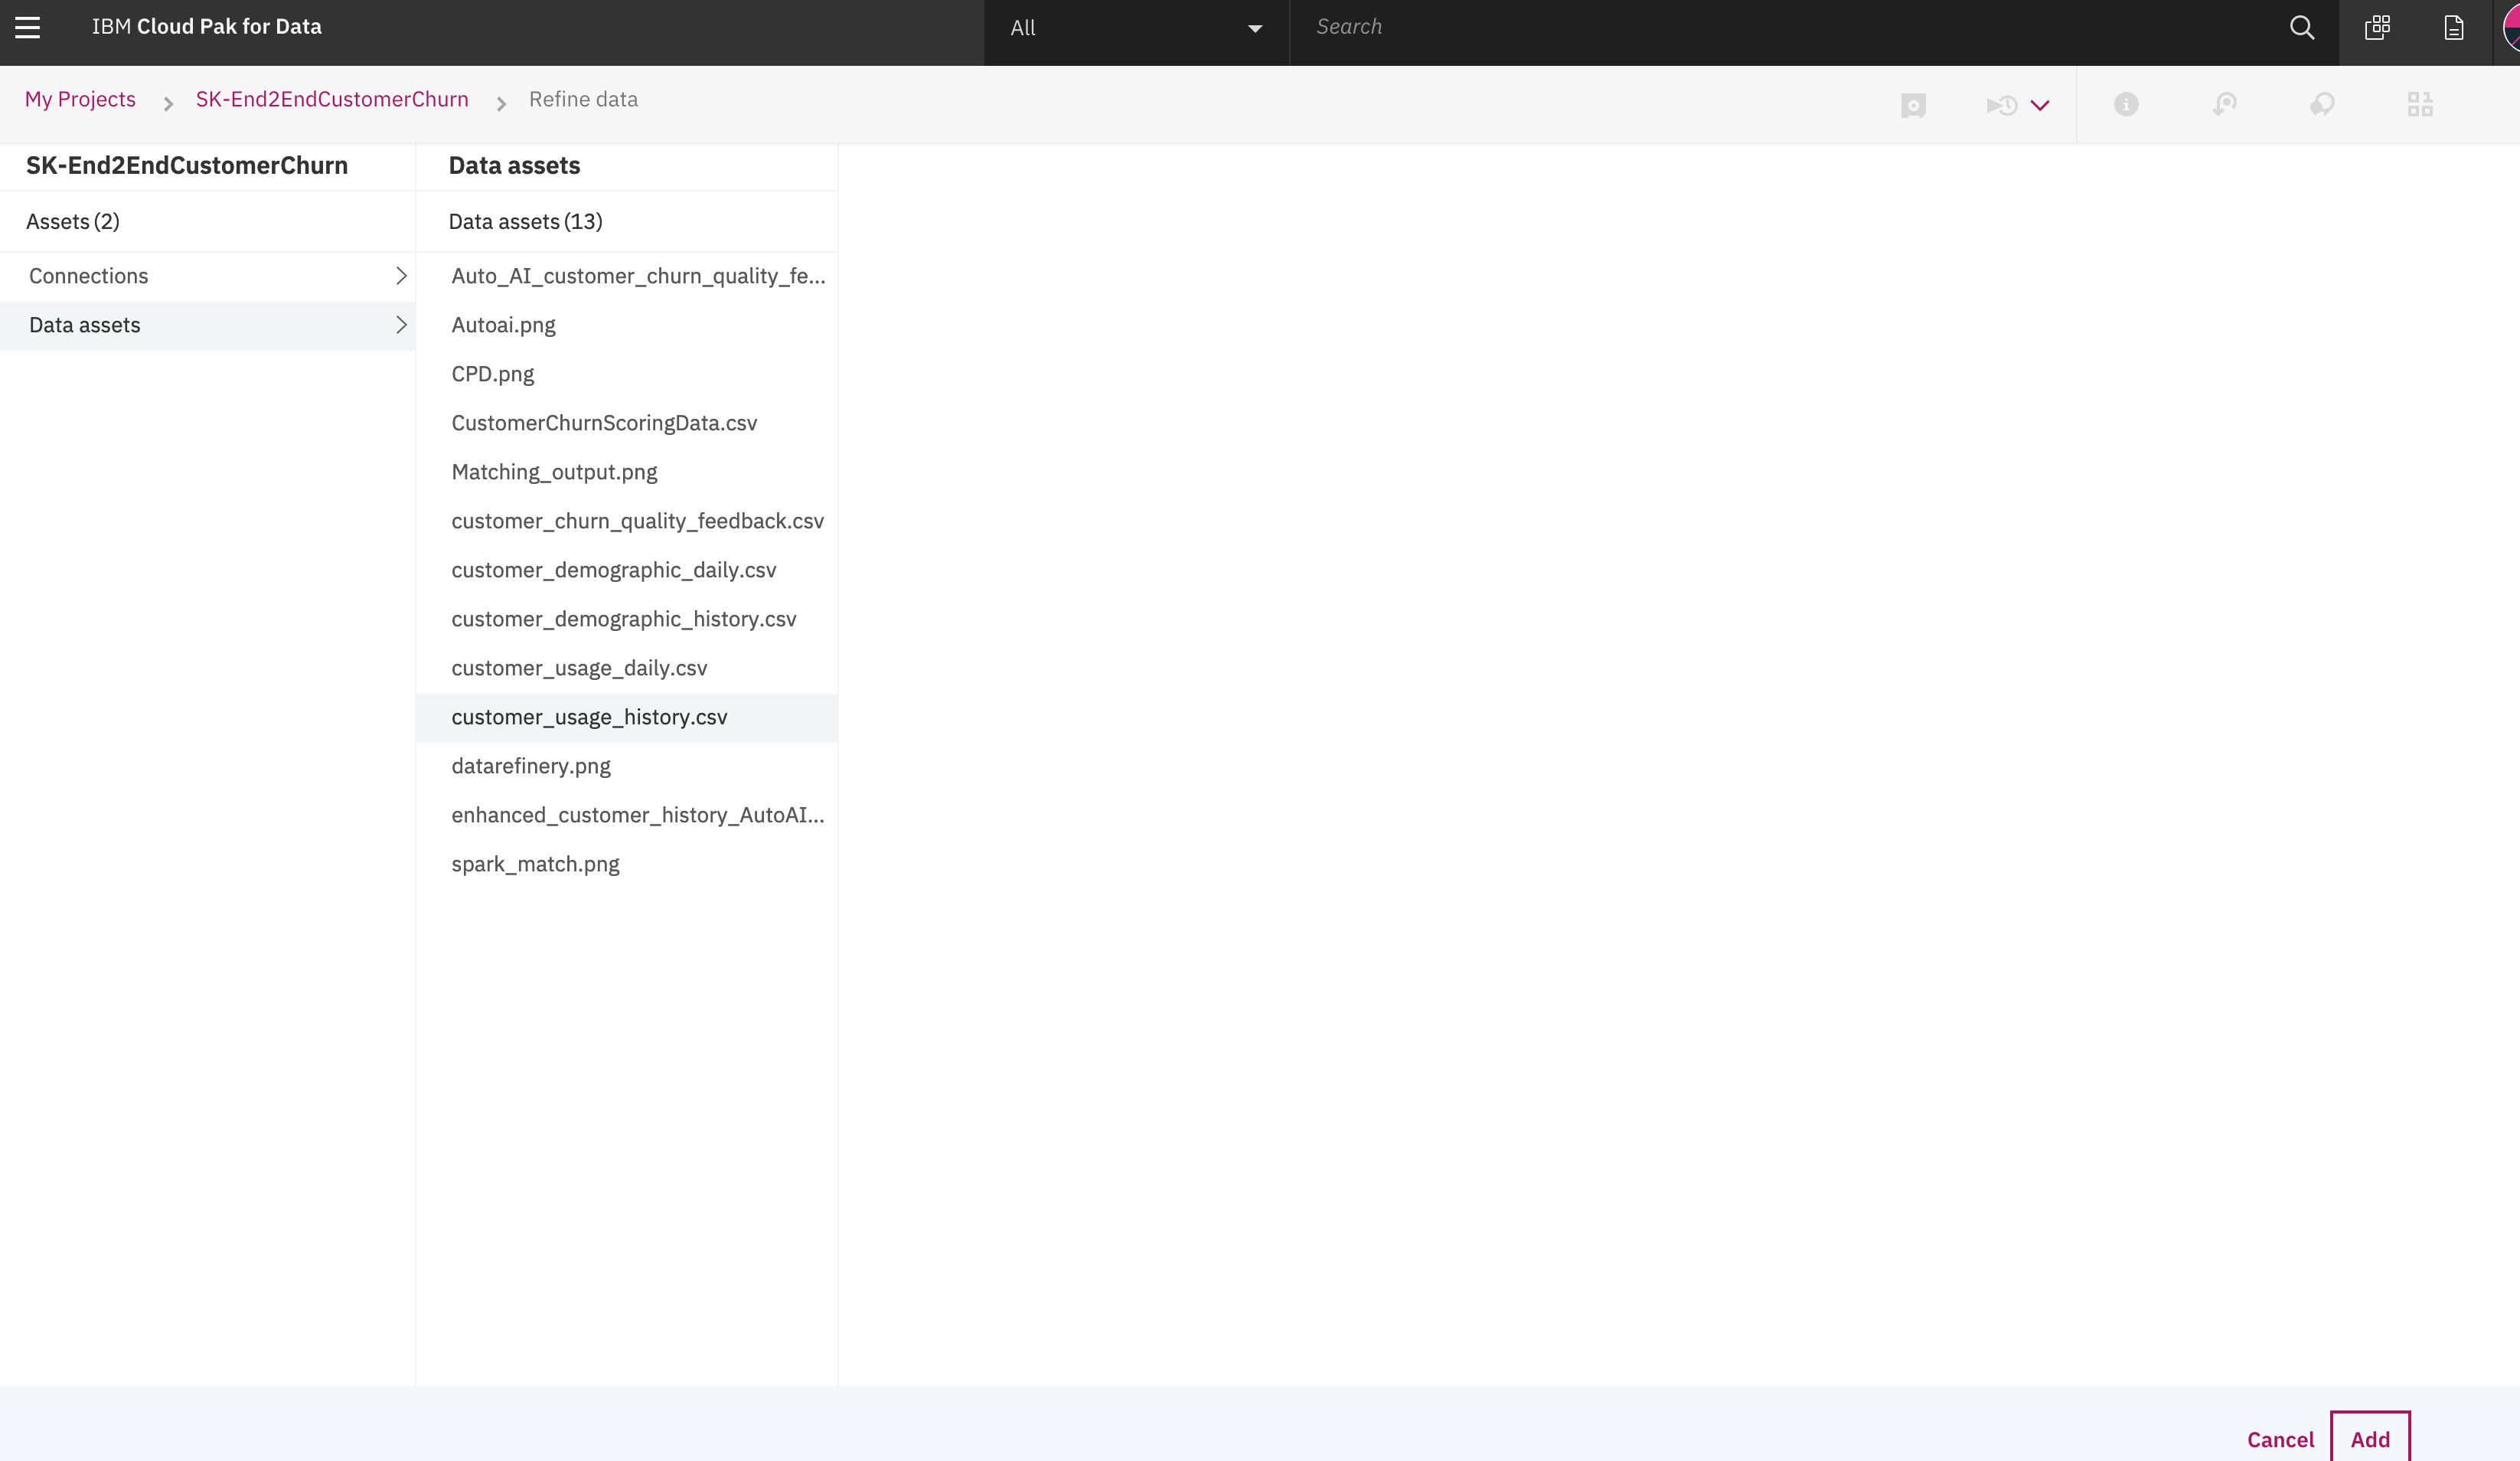

#### 2.b. View the profile tab after clicking Add to see the statistics relating to different columns

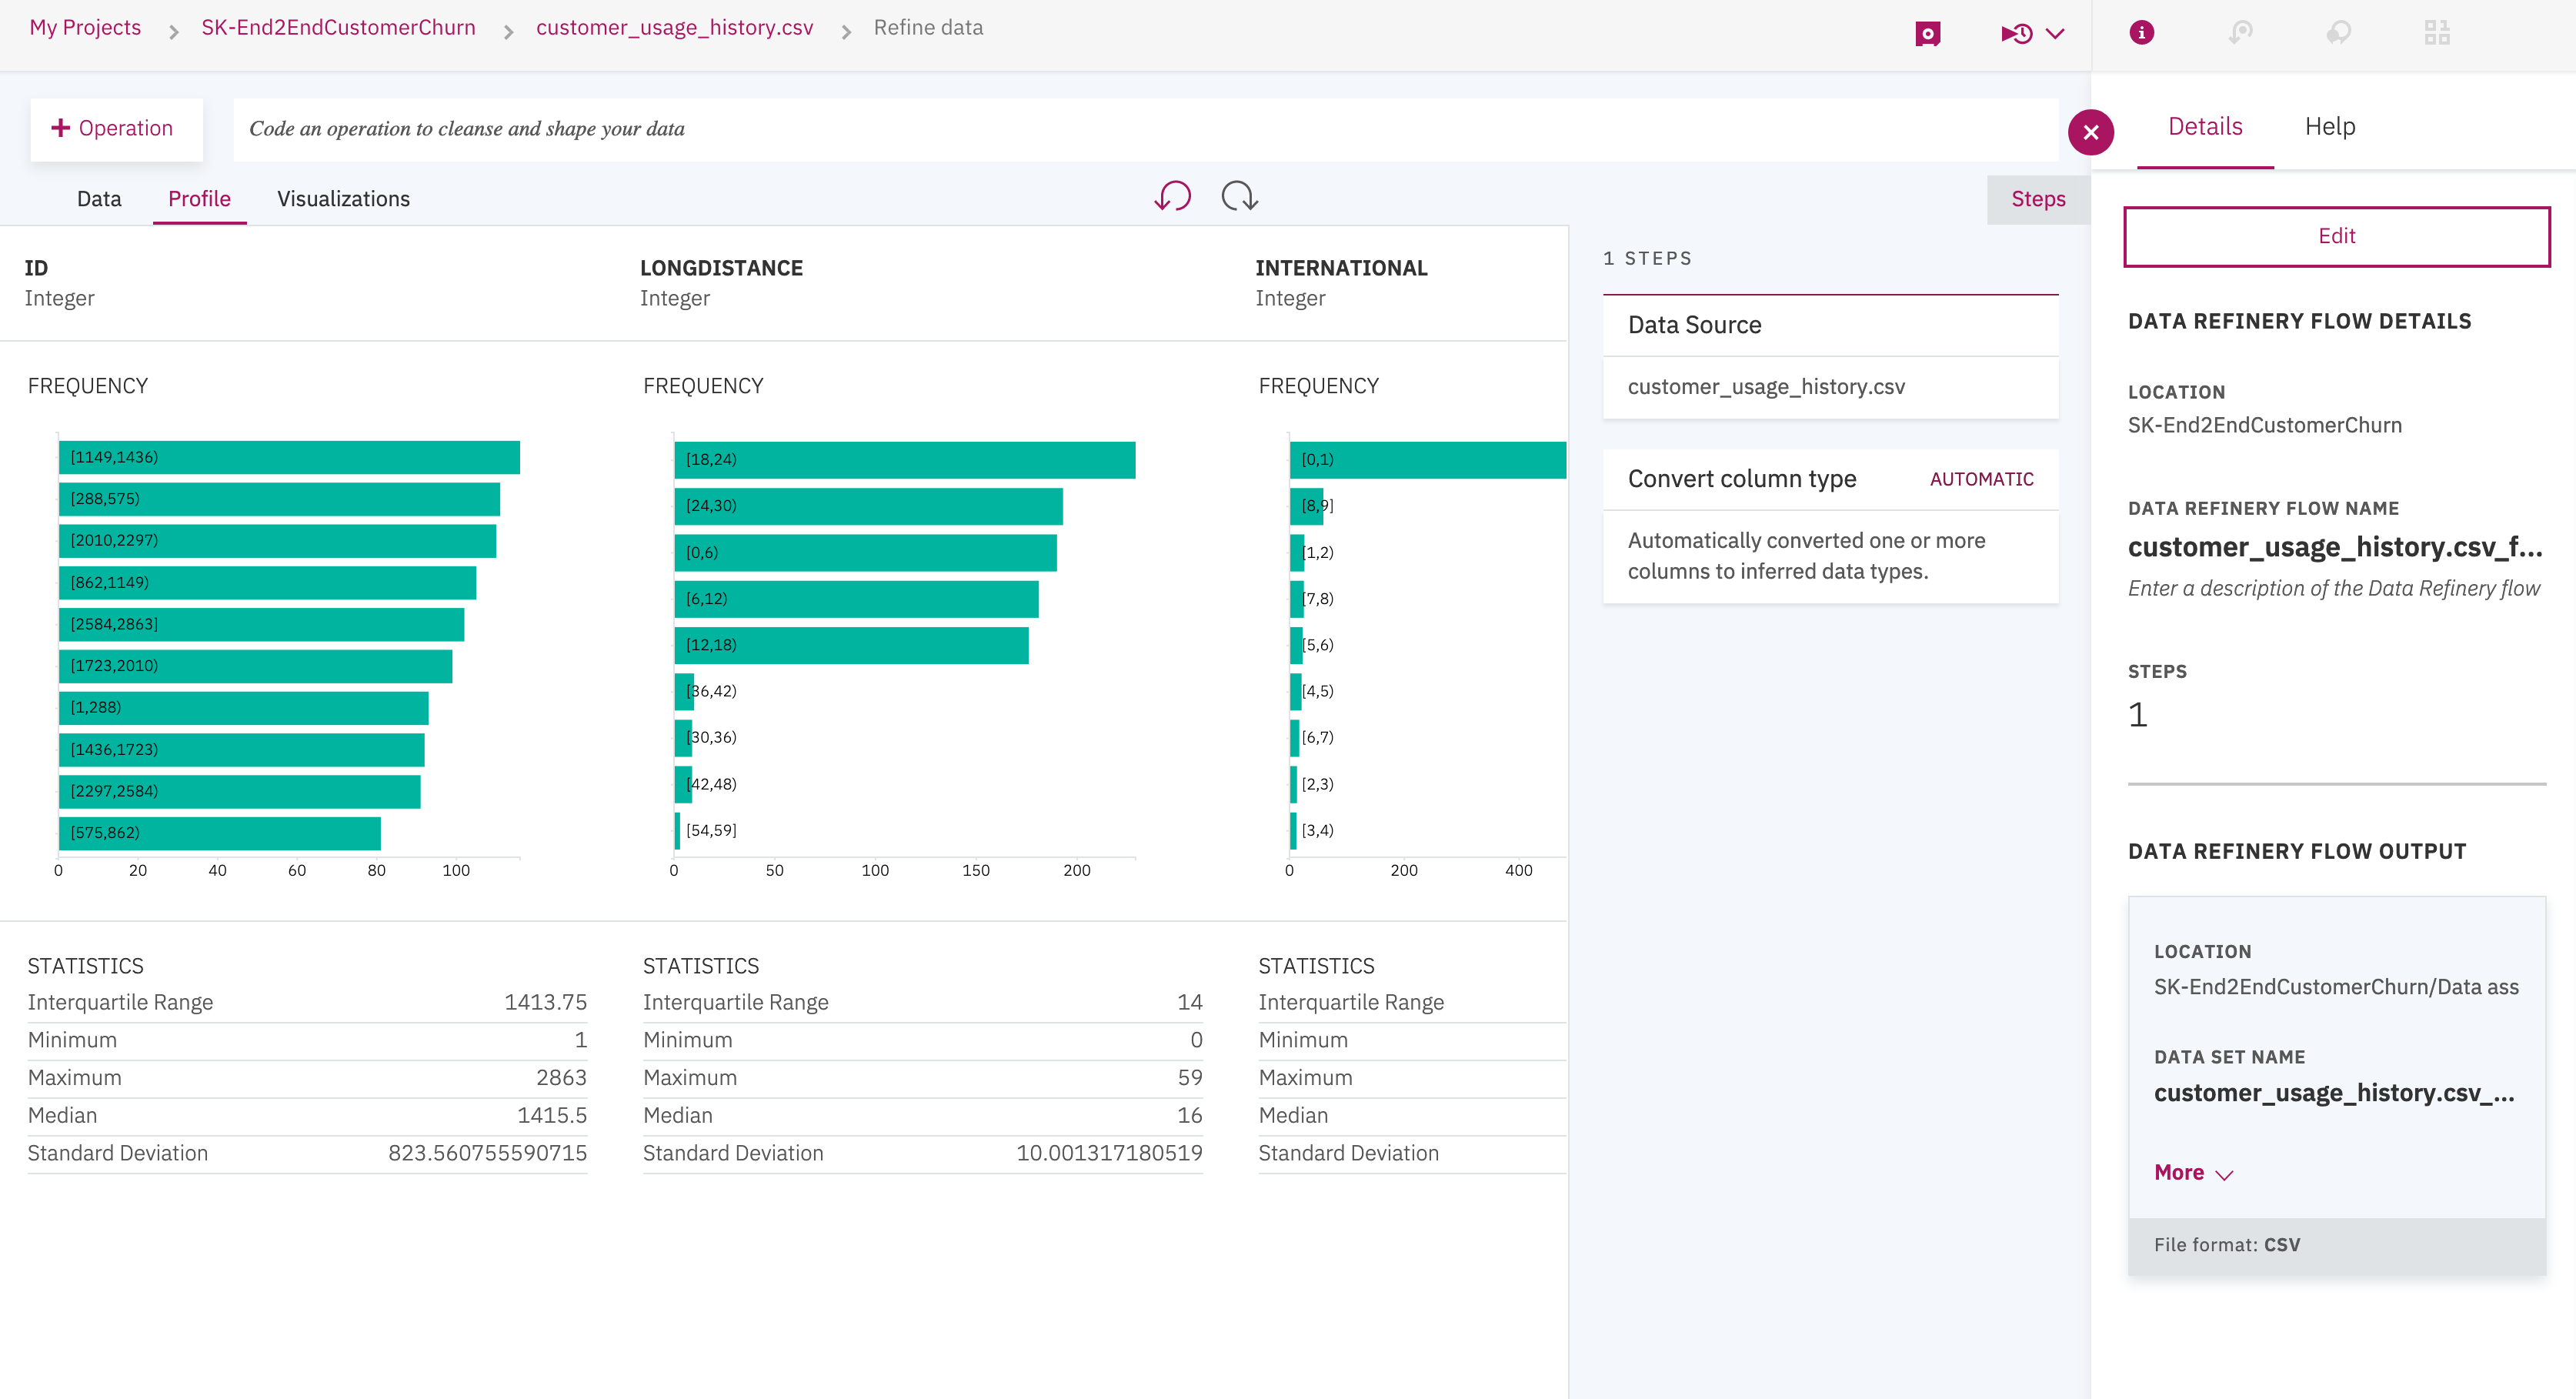

#### 2.c. Next Go to "Data" next to Profile tab. Then Click on Operation and you need to perform the join operation with another dataset ("customer_demographic_history.csv)". Find Join command "Operation" and select "Inner Join". Then Click on "Add Data Set. Instead of using csv flat file, this can also be used for tables [Step-4 below]. One could select the table from the Connections option. But before that you had to have a connection added. 


<br>

#### 2.d. Make sure that ID type is "String" in "customer_usage_history.csv". You can ensure the type is same or can change it by 3 dots next to a column which allows you to change the suggested column Type.

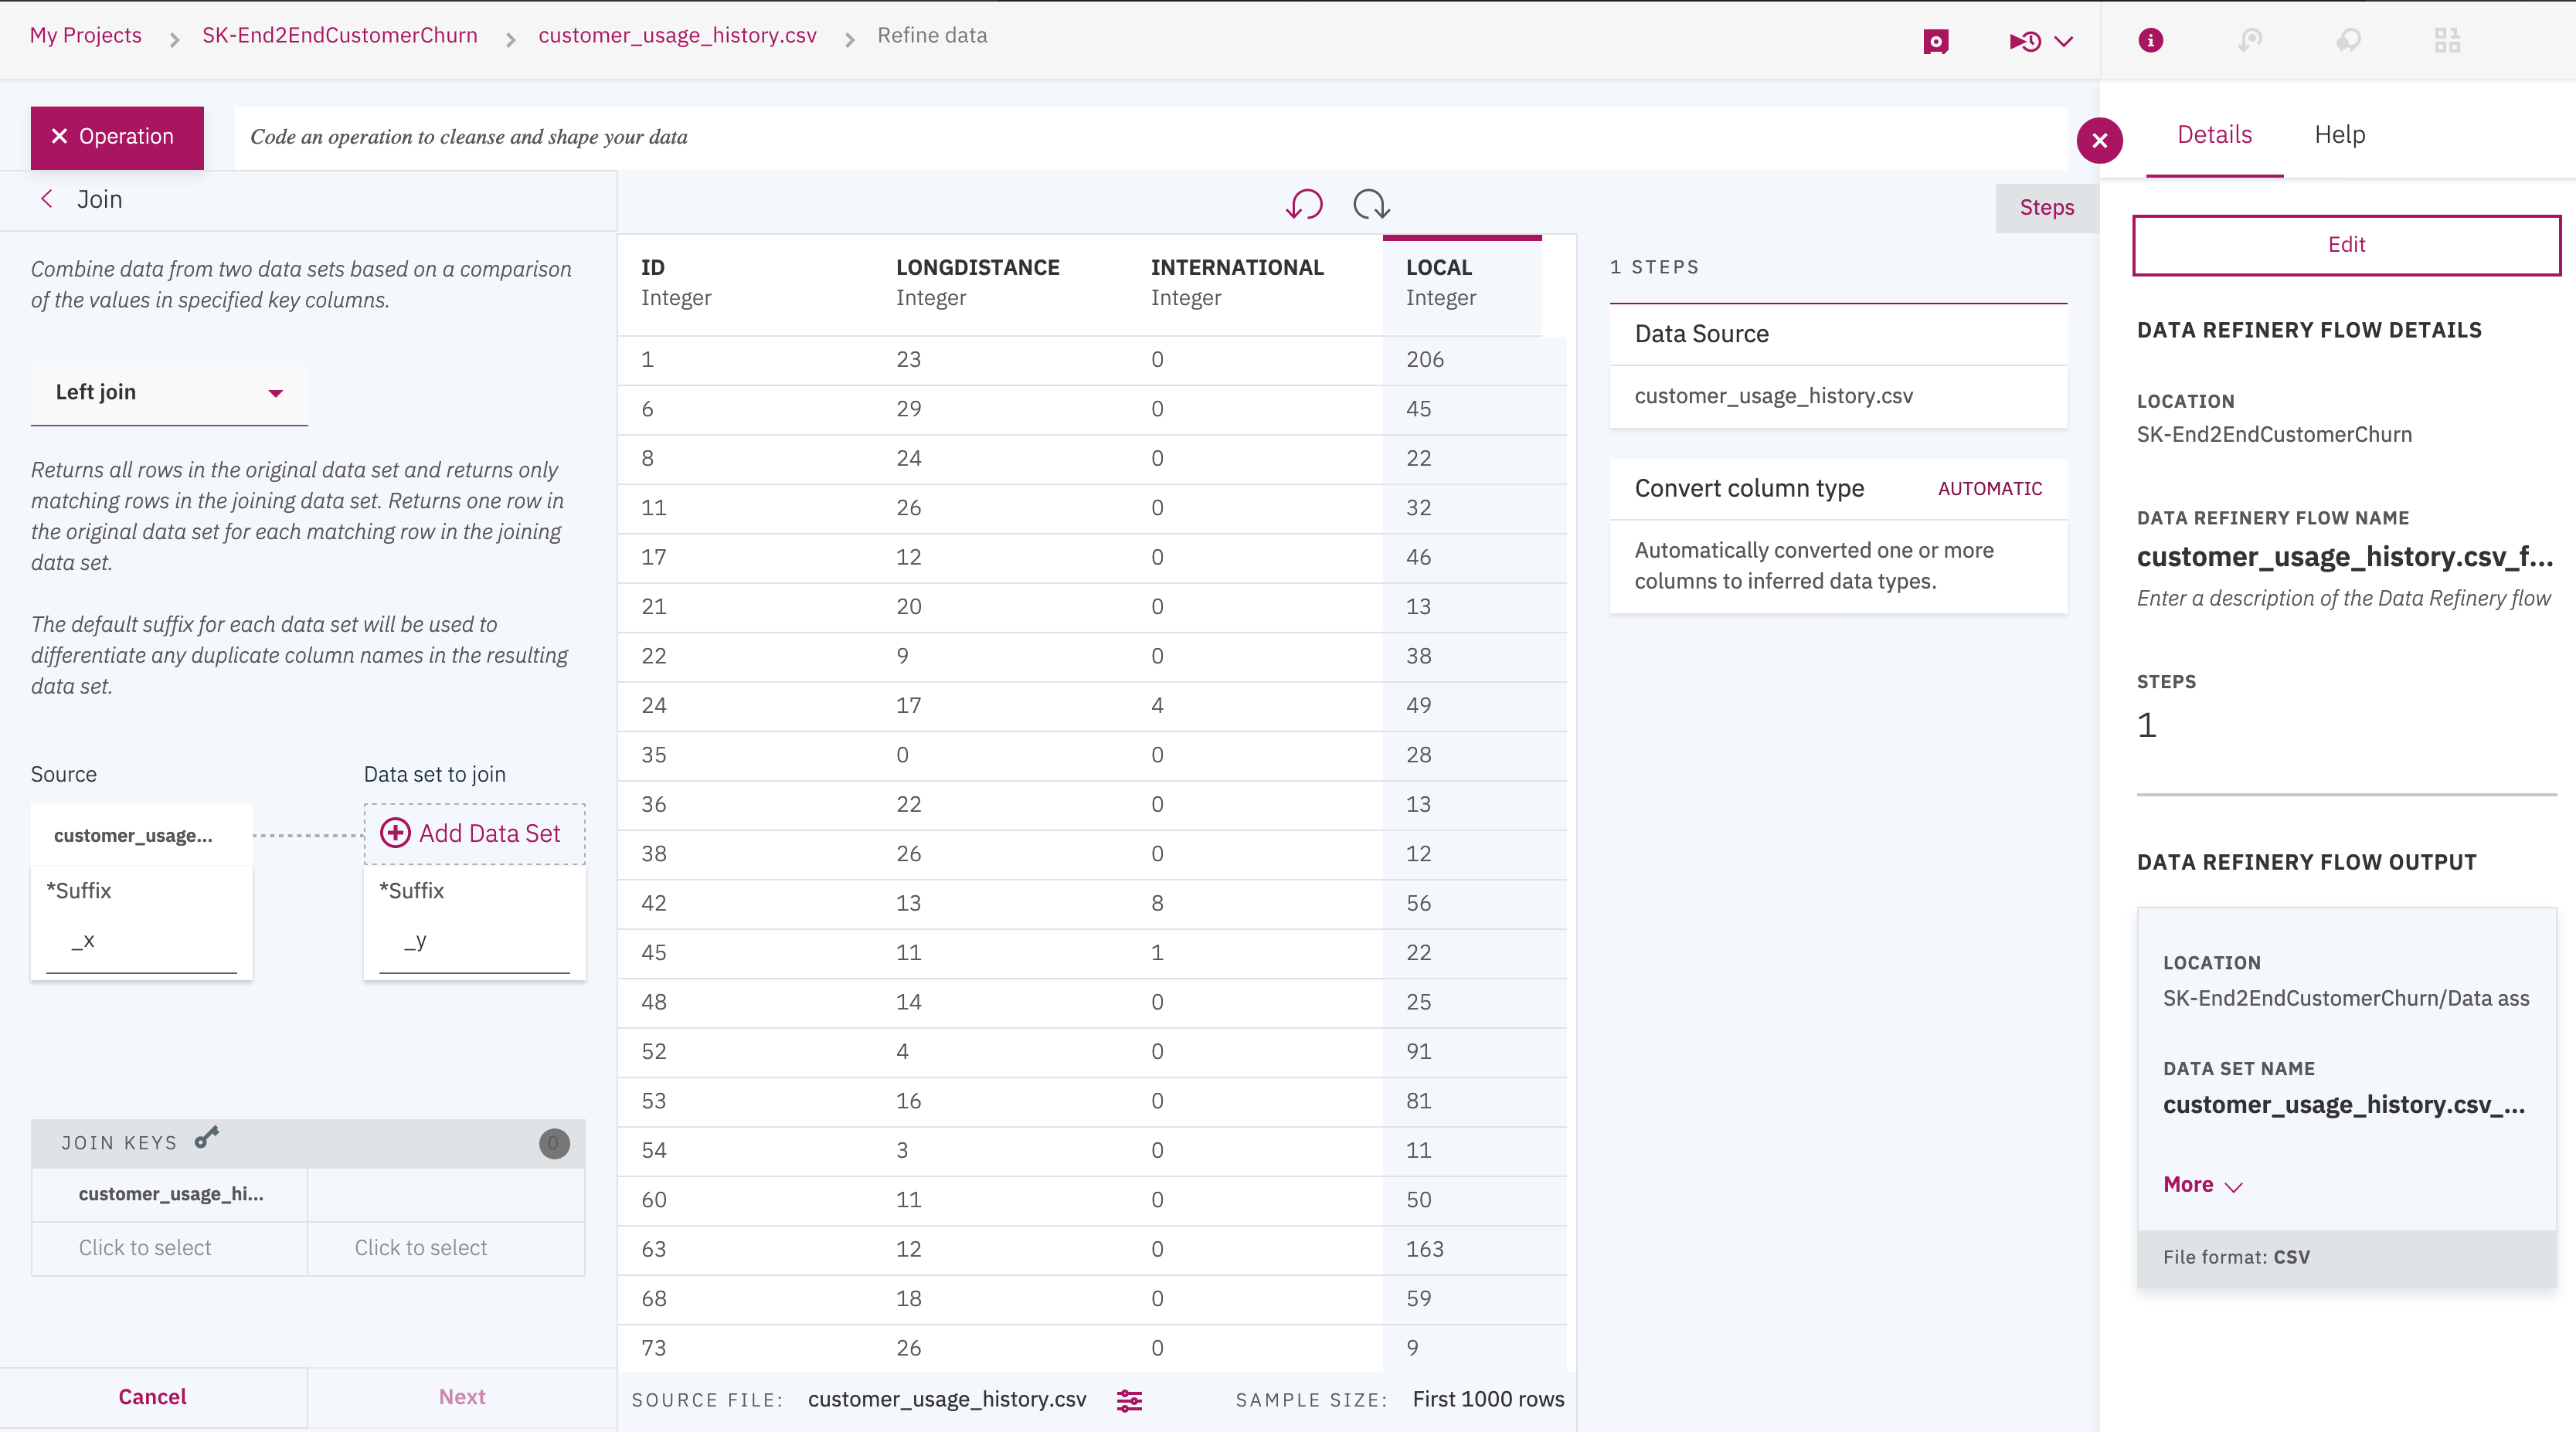

#### 2.d. Now click on Add DataSet as shown above, and select "customer_demographic_history.csv"  as the second dataset and click on "Apply"

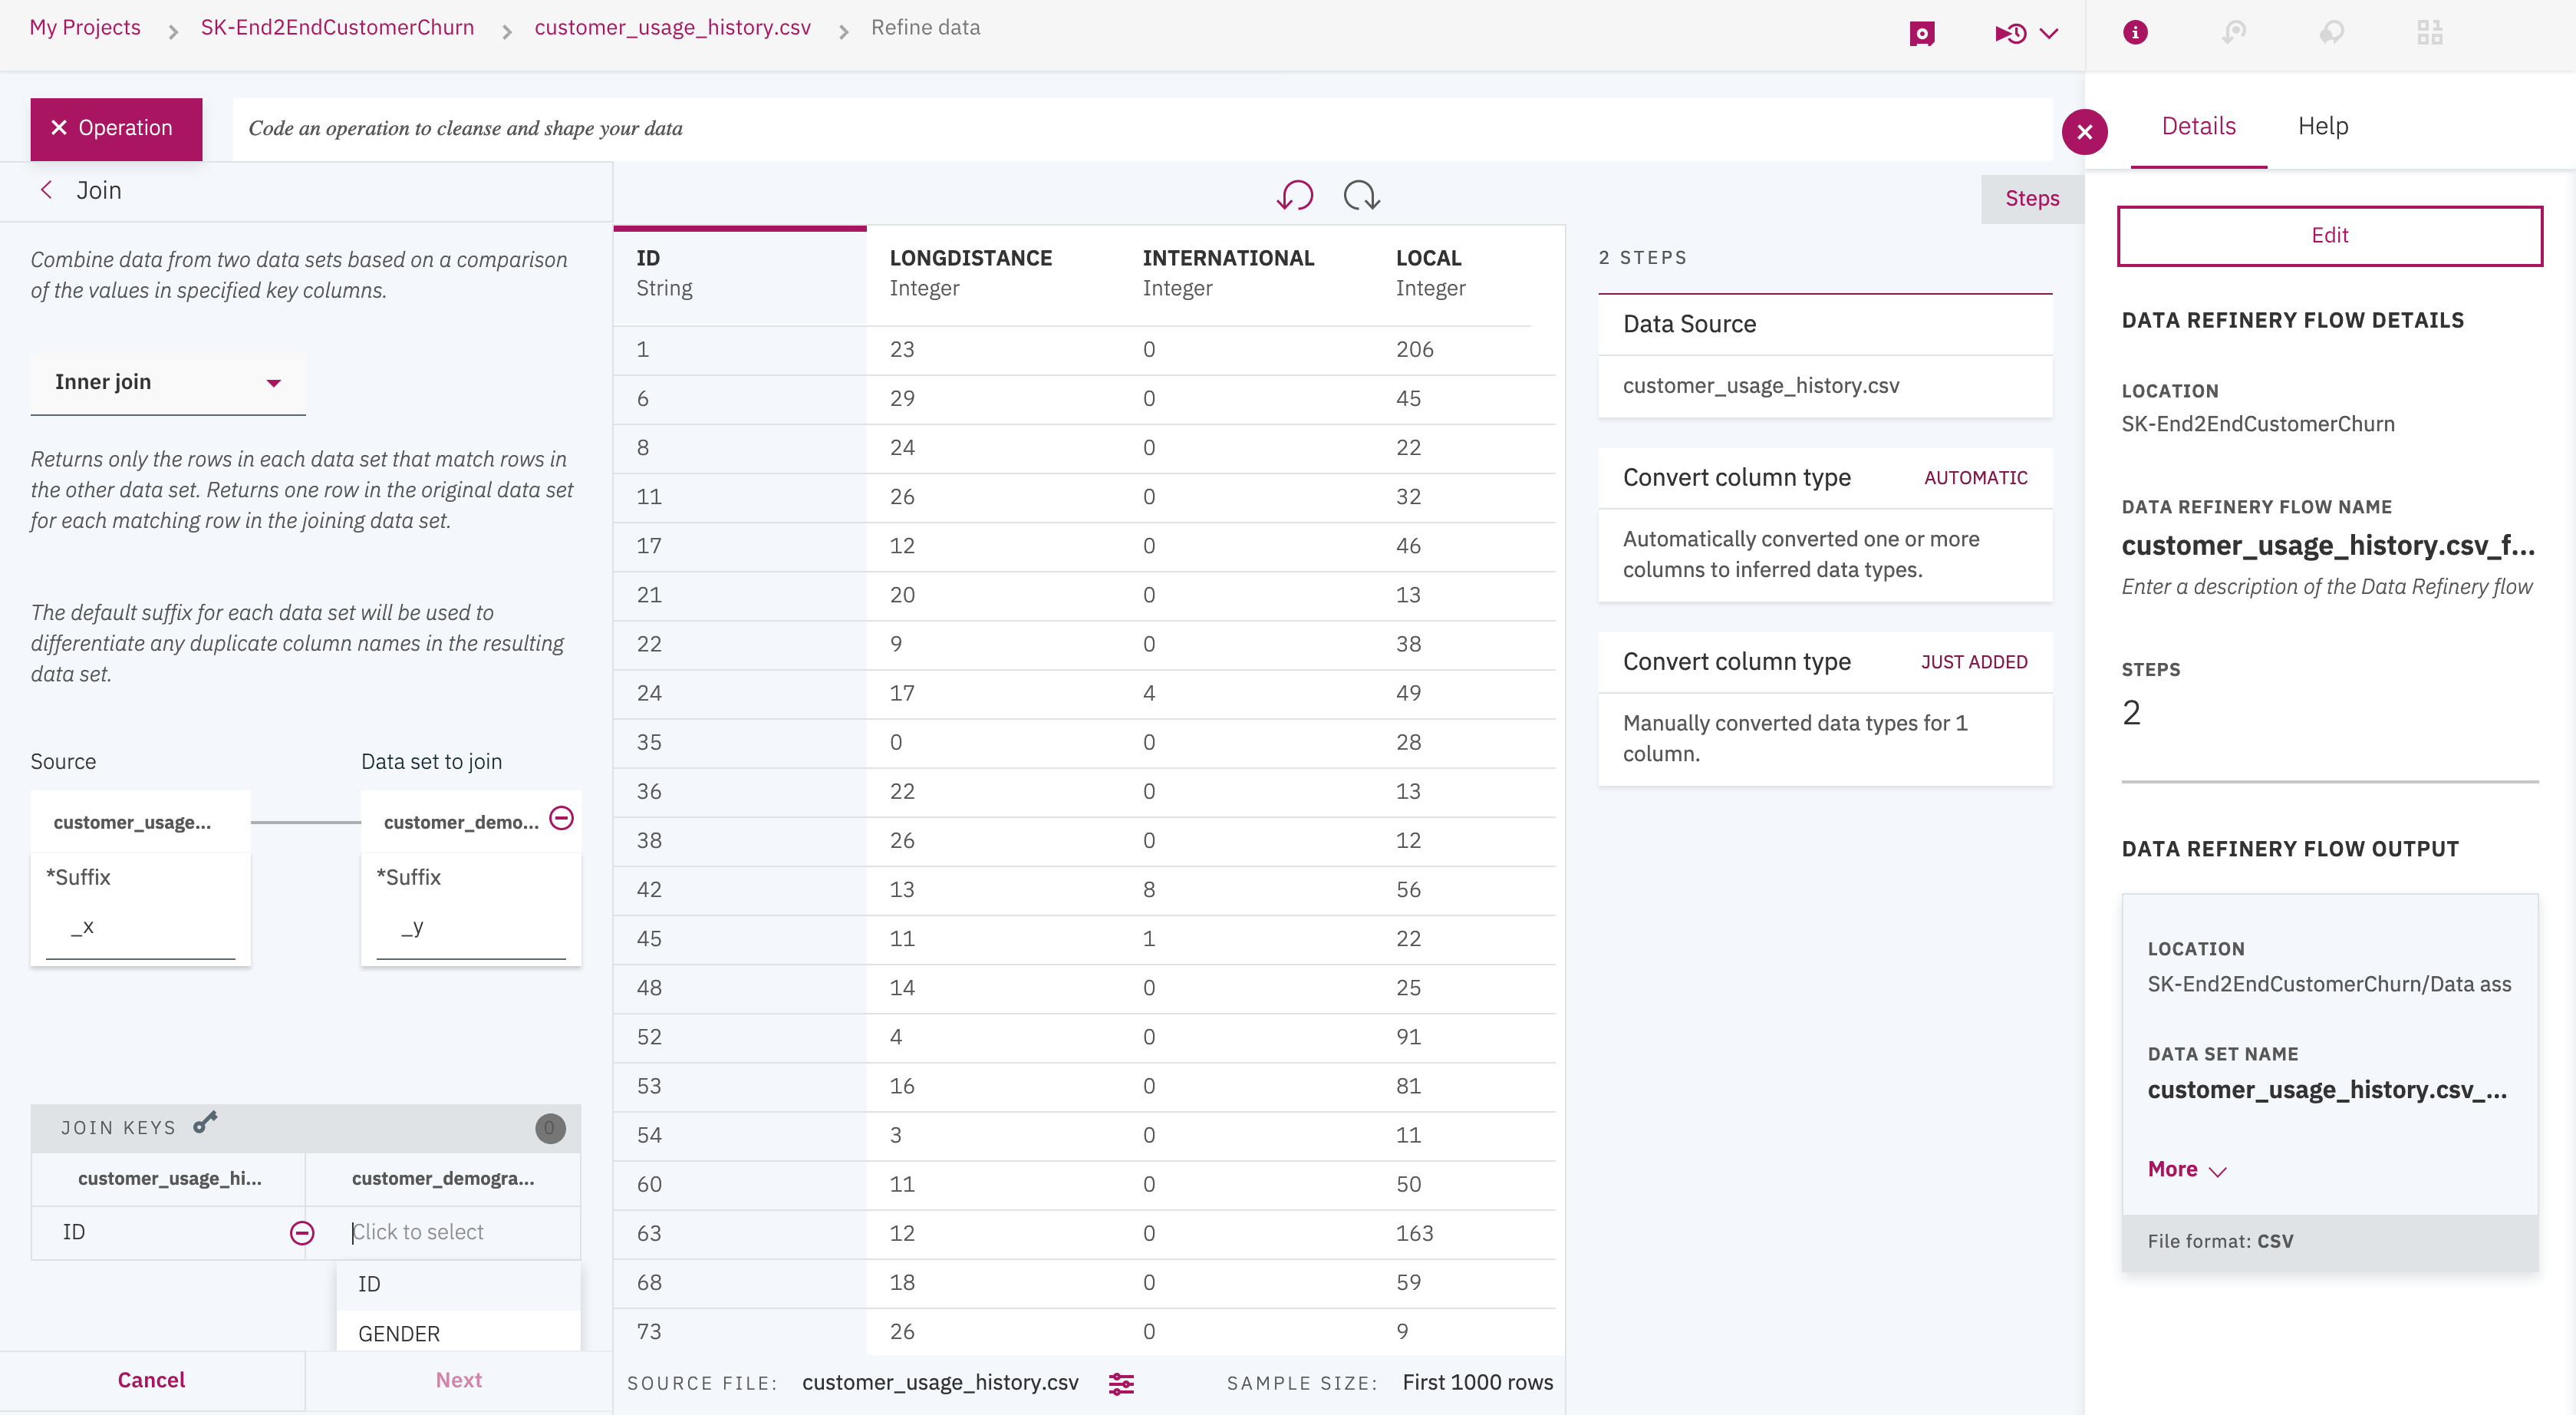

#### As seen above, we selected "Inner Join" and the join Key needs to be "ID" (since that's the common key binding the 2 csv files together). Again, just make sure that ID type is "String" in both the files (Otherwise, you might not be able to join the keys due to type mismatch). 

#### 2.e. Click on Next and you can remove "ID" column when saving it and click on "Apply" (as shown below)

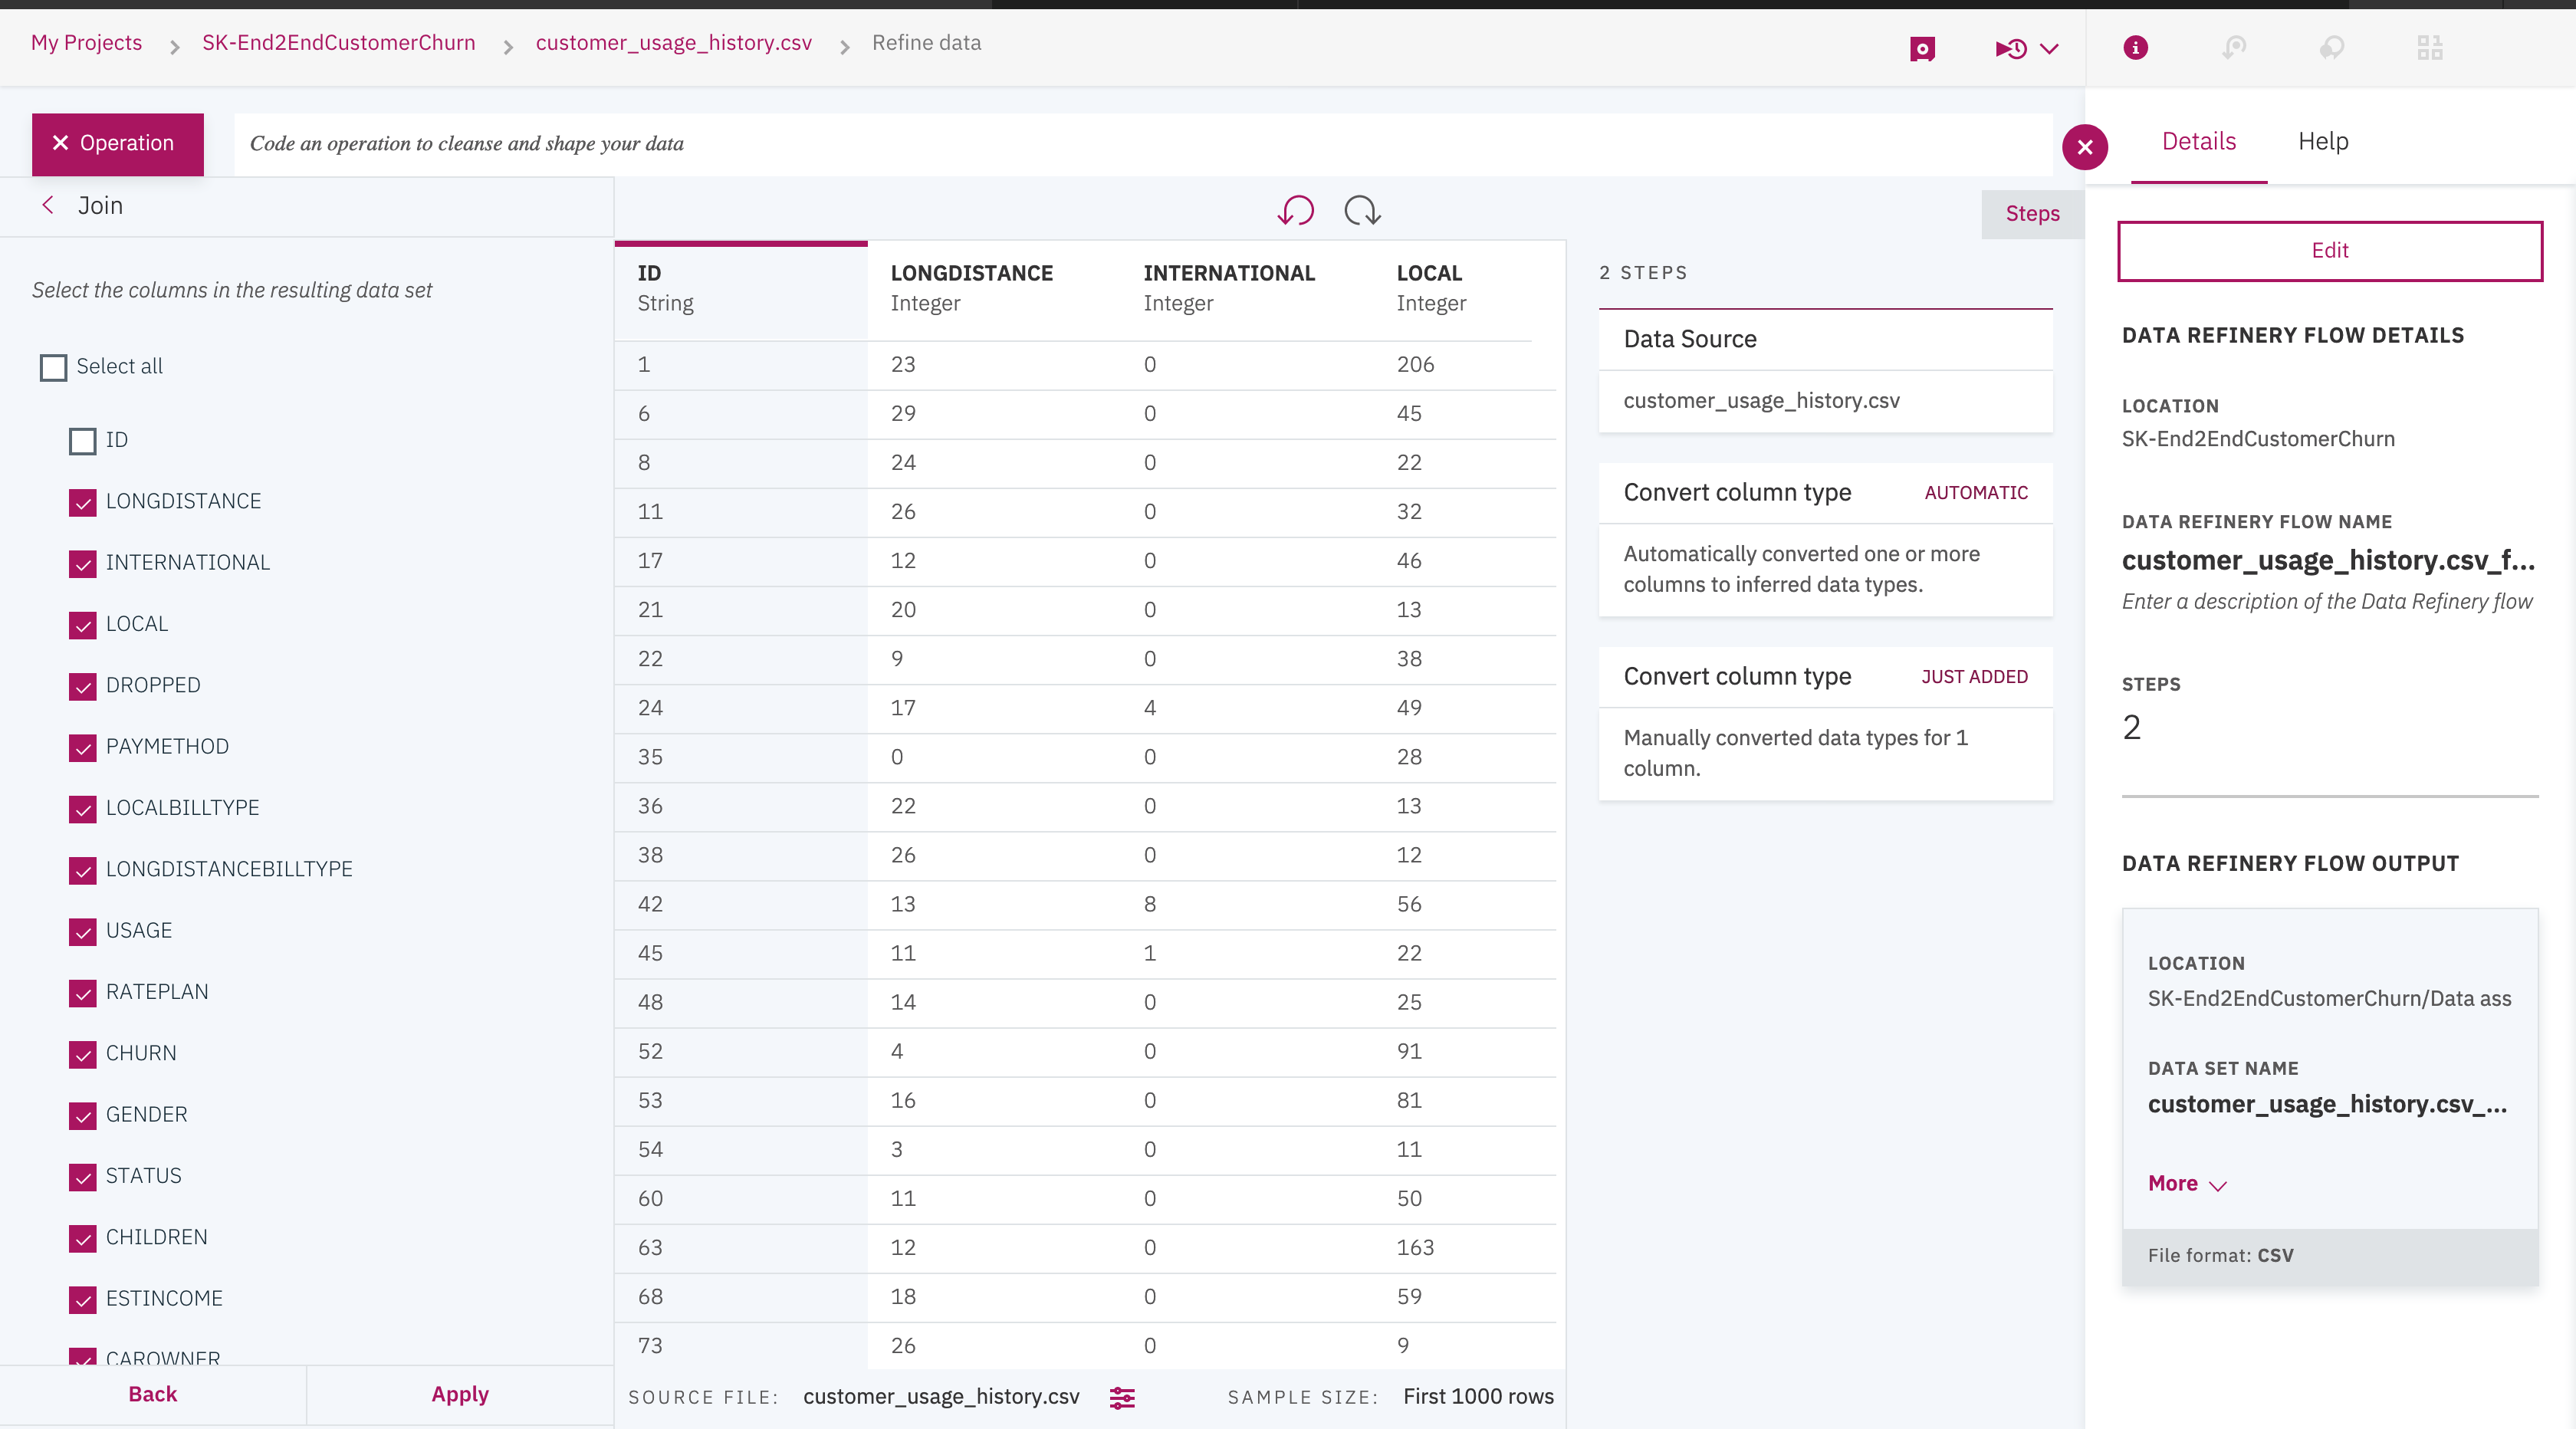


#### 2.f. Convert the Age type to Decimal, if it is String just like you did for changing the type for string using the 3 vertical dots when hovering over the specific column. Also, make sure the other data types are appropriately typecasted. 


#### 2.g. Now we will create a new column "Phase" where we will add the condition of user's age. Select Age from the list of columns from the Pane then click on "Conditional Replace" Operation. Now, add the condition as shown below. If Age > 18 (as shown below for value), then Phase indicates adult, otherwise Child is allocated.

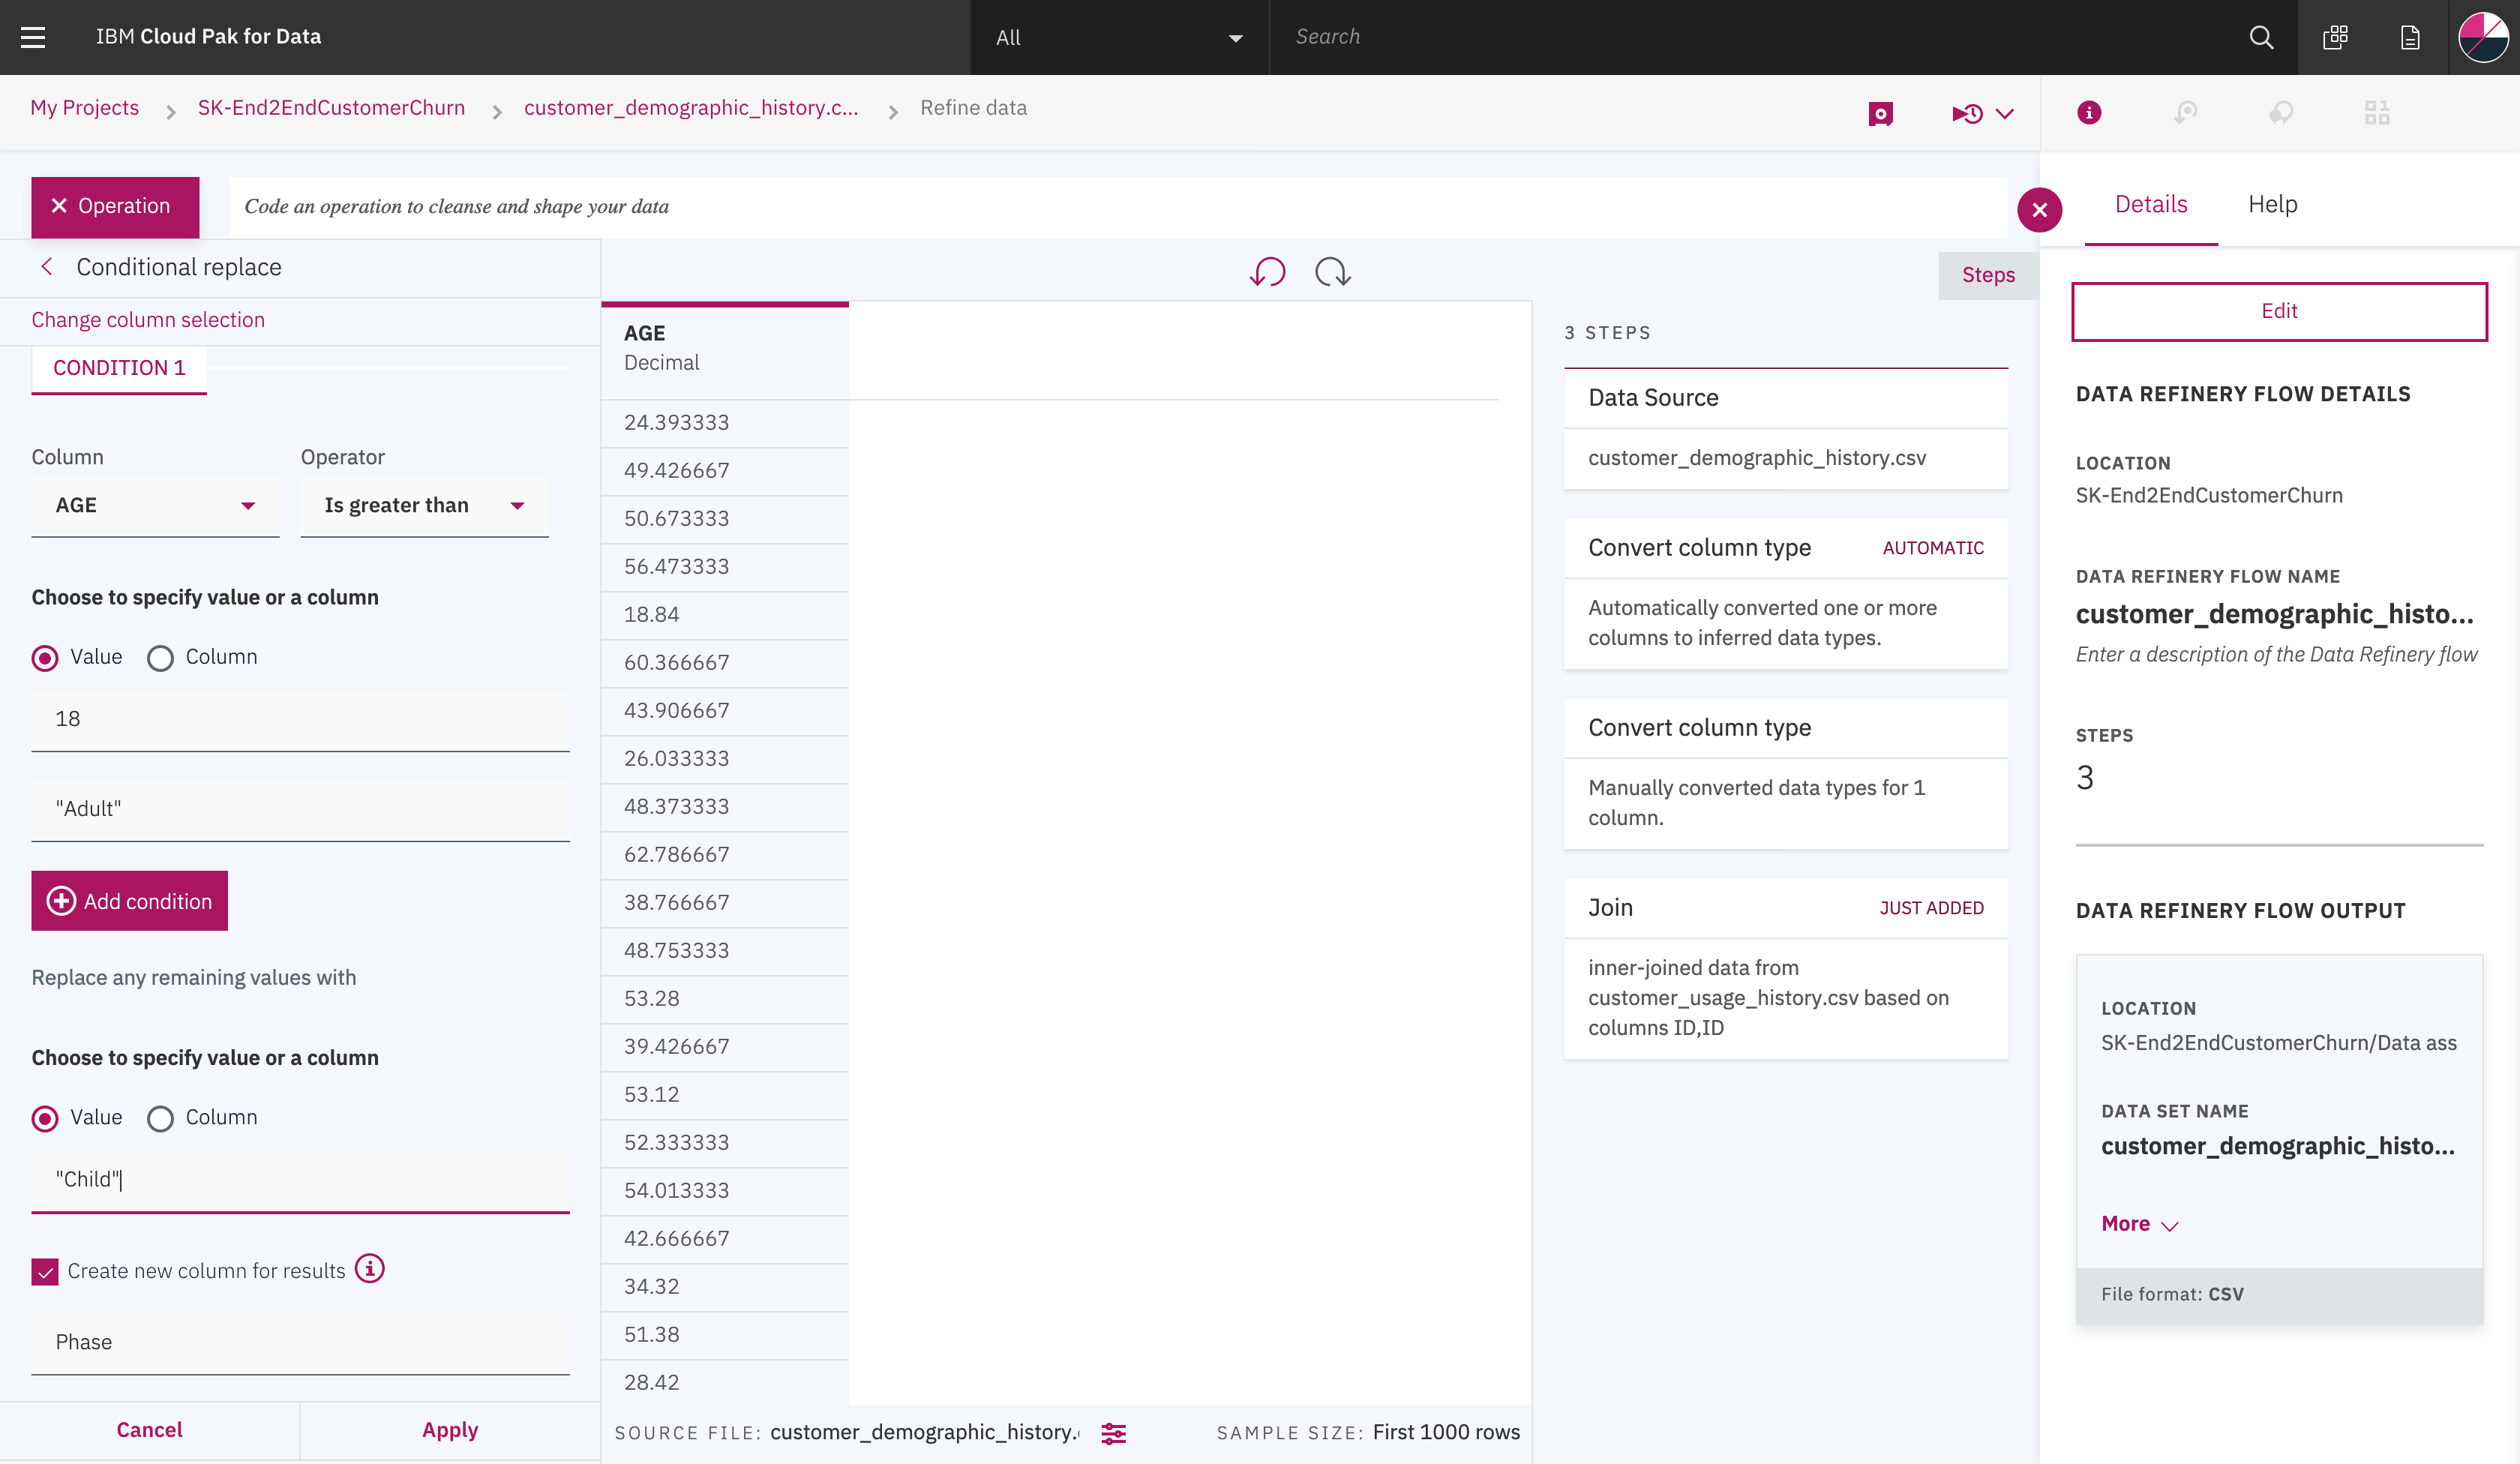

### Step 3 - Saving Output File using Data Refinery


#### 3.a. Once the above steps for data preparation are executed, click on Edit button under Details tab on right pane (as shown in image above). Now change the output to store the result in a csv file. Use the 'Edit Output' button beside Location. After that under 'Data Set Name' to provide a name (like enhanced_customer_history.csv) of the output file. Click the 'Tick' sign beside 'Edit Output' to save this. Next click 'Done' button to go back to the main Refinery page.

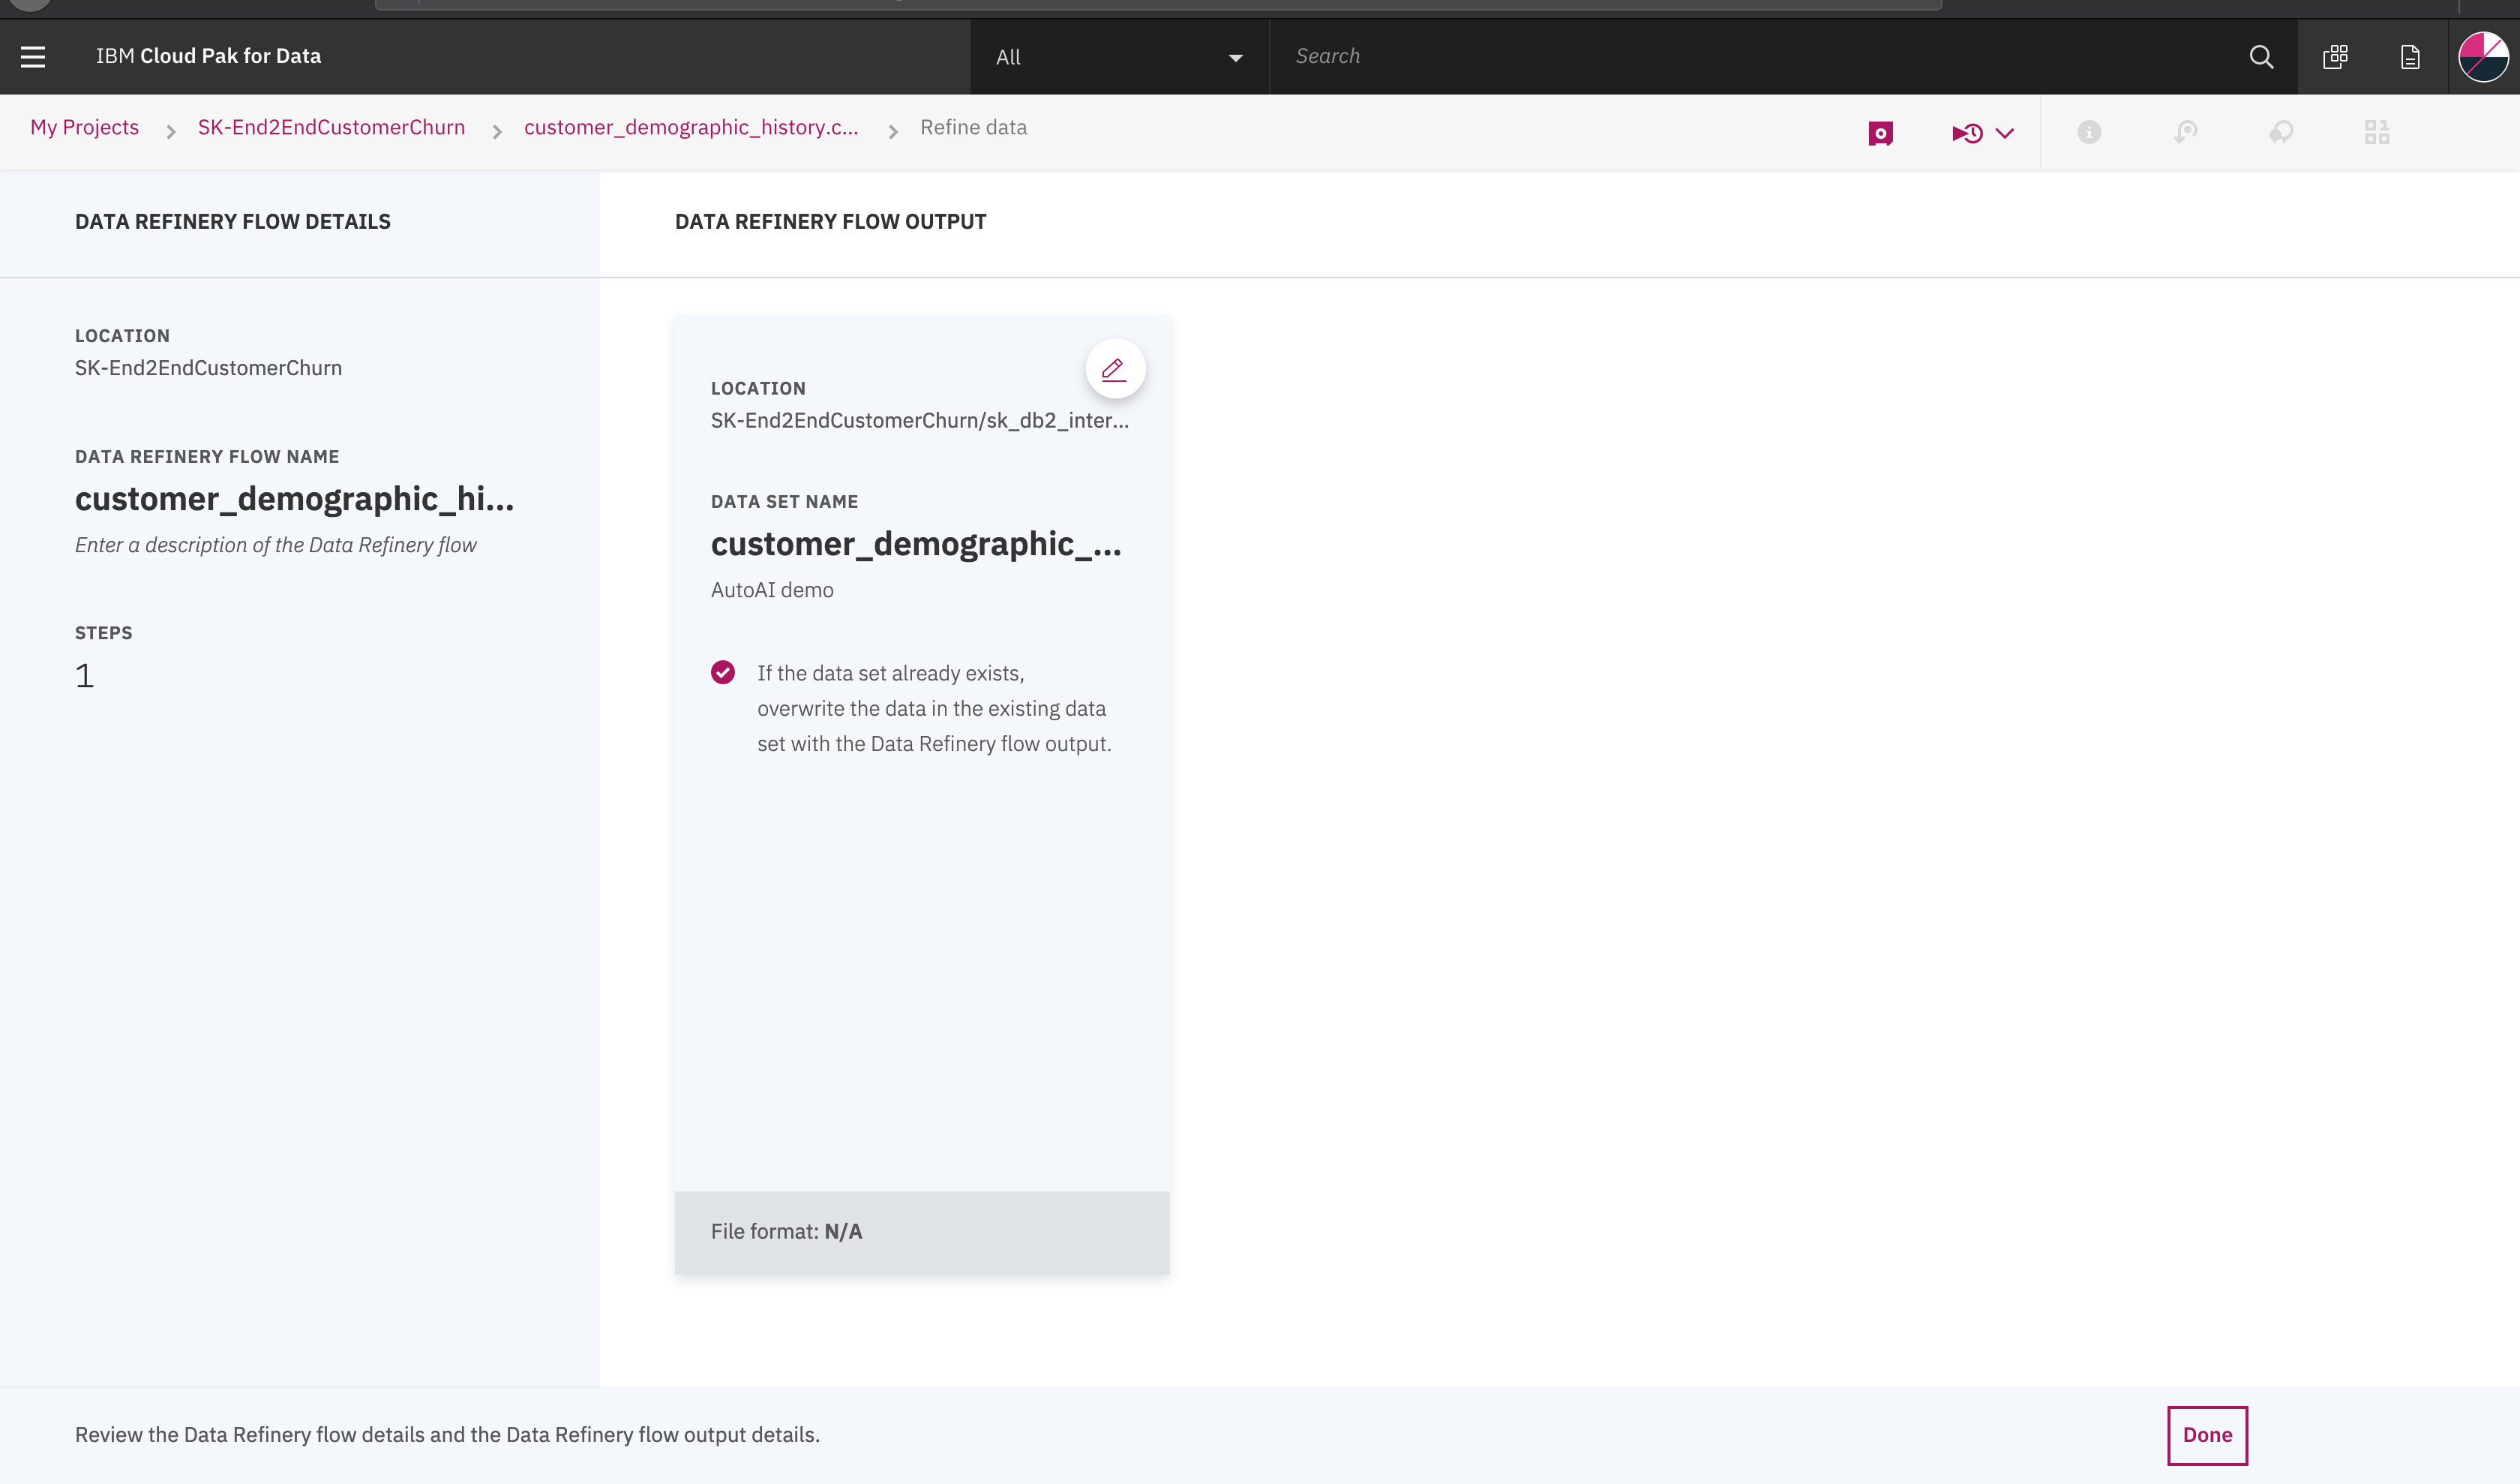

#### From the main page of Refinery go to the Job Icon and Click on 'Save and Create a Job' to create the Refinery Job for the steps you added so far. 

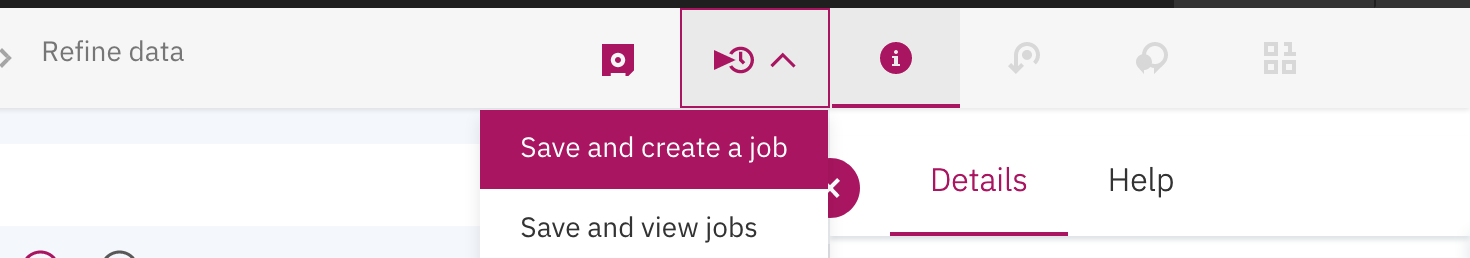

#### In the next screen provide a name of  the Job and click on 'Create and Run'. This will bring to the next page where you can see status of the Job. Wait till it gets the Completed state.

### Step 4 - Data Refinery for Uploading Training Data to Db2Wh

#### In the Assets tab, go the section for Data Refinery Flow. In that section you can see a flow that is saved from previous step. Open that flow by double clicking it. Go to the Information section in the right pane and click the Edit button. This will take you to the page where you can again change the location of the output. To do that click the 'Edit Output' button beside Location. Next click 'Change Location'. 

#### In the next page you can select the connection of DB2Wh local to the CPD cluster you are using. In that connection, navigate to the schema of the same name as of the userid that you have as prerequisite. Then, click on "Save location". Now provide the name of the table where you want to store the output under Data Set Name. The table name should be all in Capital letter. At last click the 'Tick' sign beside 'Edit Output' to save this. Next click 'Edit' button to go back to the main Refinery page.

#### Next again Create a Job, Run the same and wait till it is Completed successfully as you performed previously for saving the output in a CSV file. But this time it would save the output in the target DB2 table that you have specified. See the steps below indicating the overall flow:
<br>
<font color=red>Note: You must have created a Data connection connection in the project based on DB2 connection in the previous step prior to saving the updated table in the Database. Also,one should also change the name of the flow. Otherwise it would overwrite the previous flow which shouldn't be the case.</font>

#### In this case, run the refinery again for enhanced_customer_history csv file and save the enhanced history table in the DB2Wh using the following steps:

####  4.a. Click on change location after giving a suitable Data Set Name as indicated below

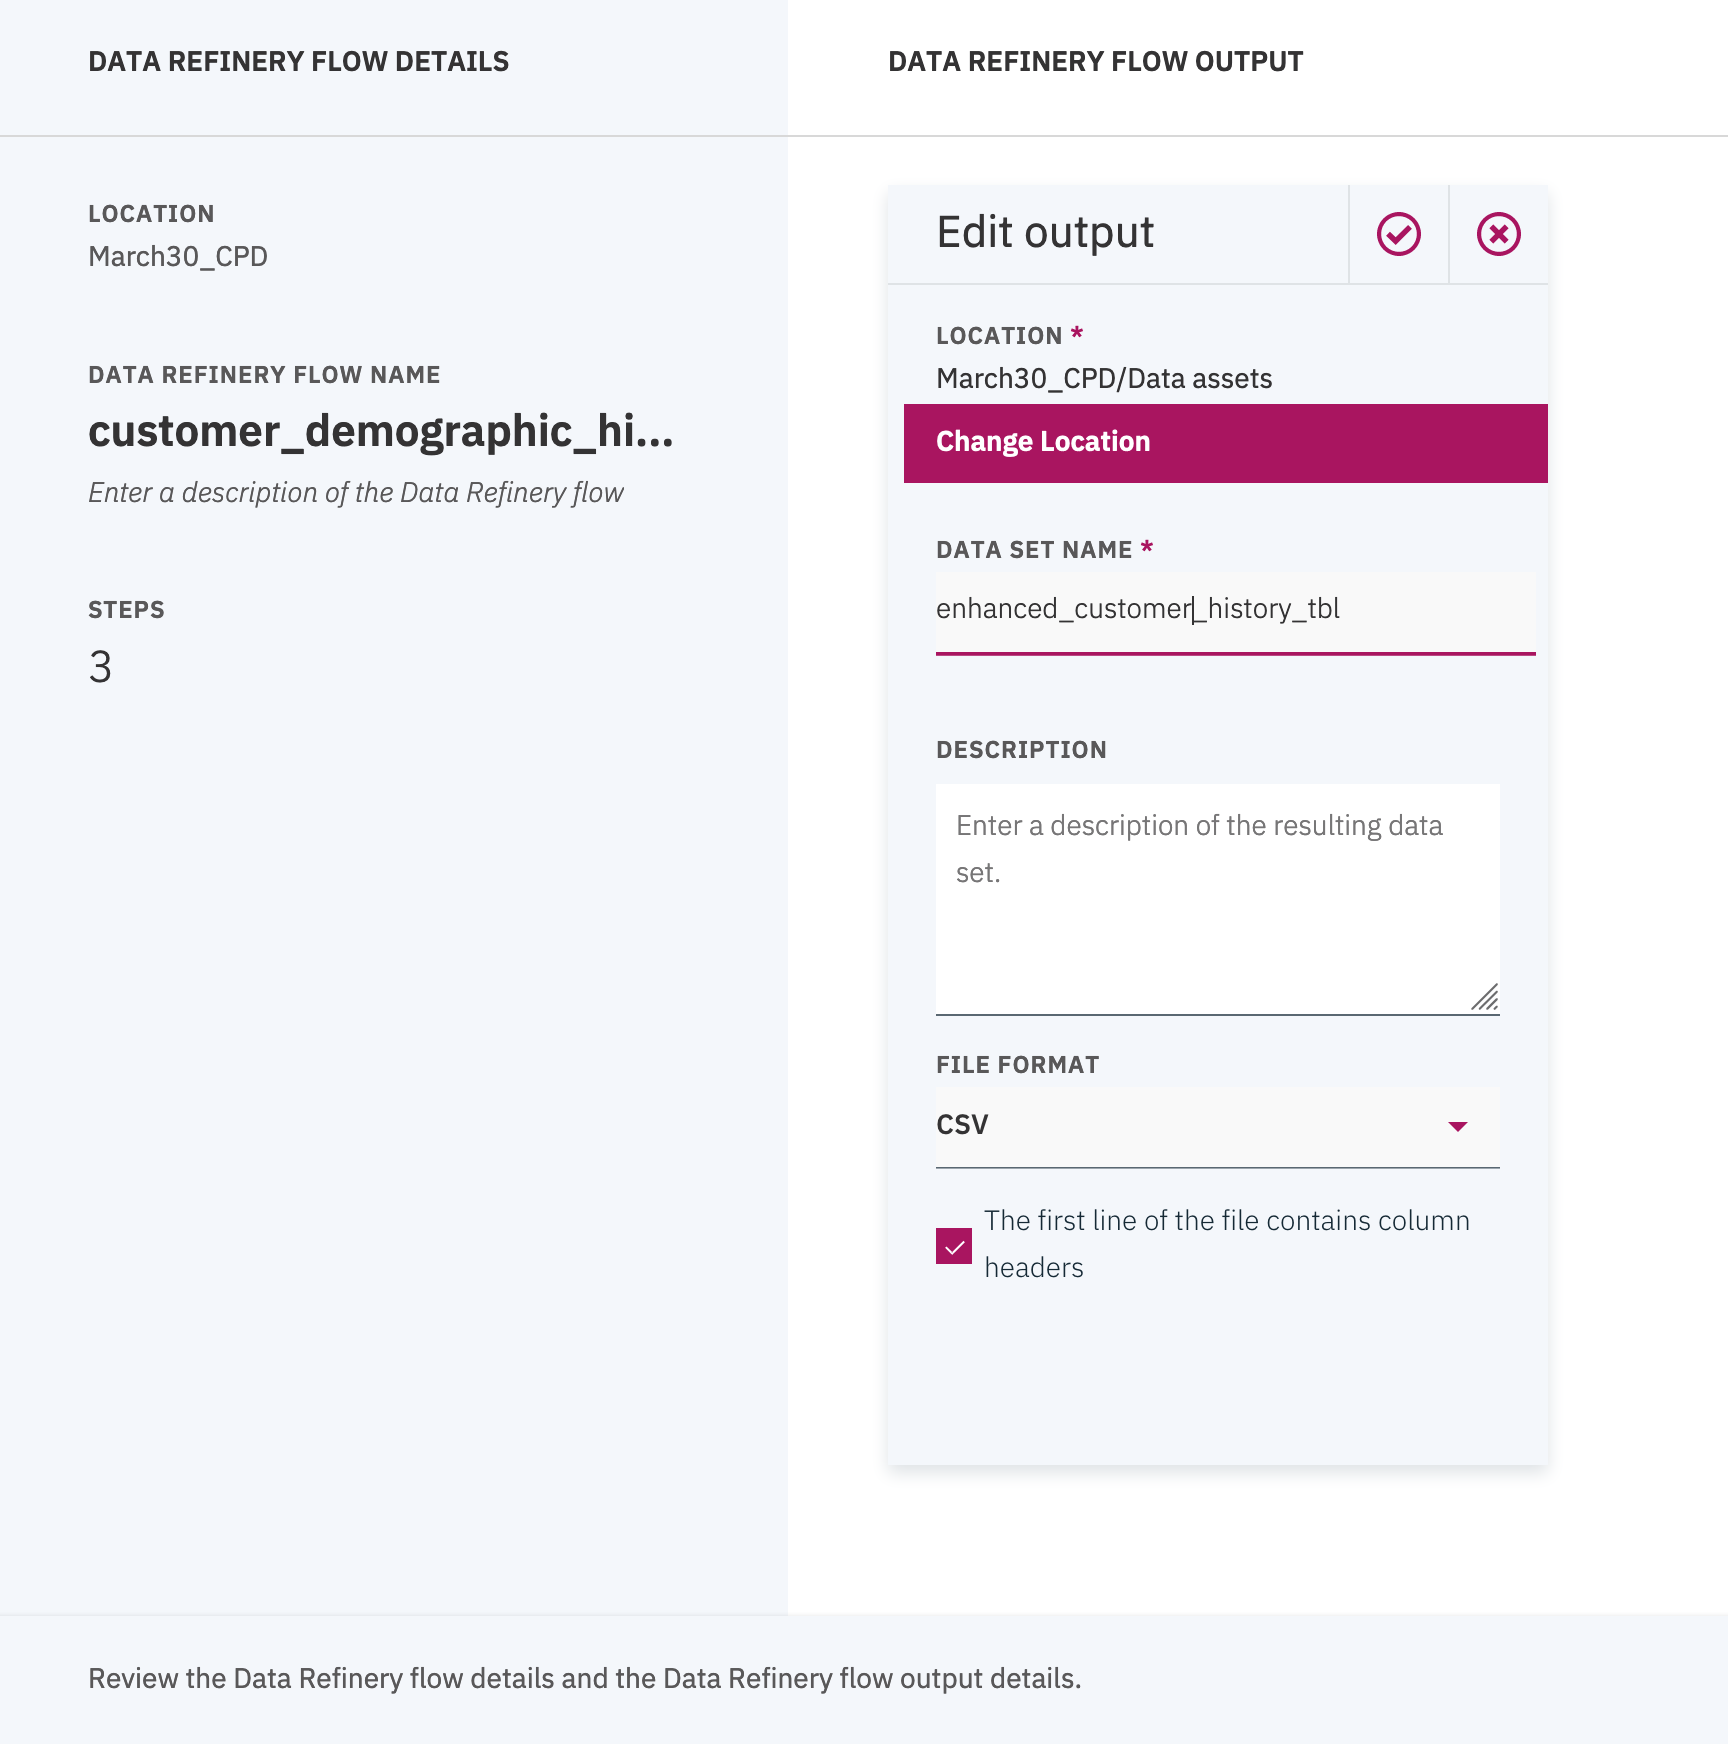

#### 4.b. Once we click on changing the location, we click on connections --> DB2 name --> USER999 --> Click on save location.  

<font color = 'red'>Note: In this case, `USER999` is the schema name. The schema name does not have to necessarily be `USER999`. The schema name would be provided by your Admin. </font>

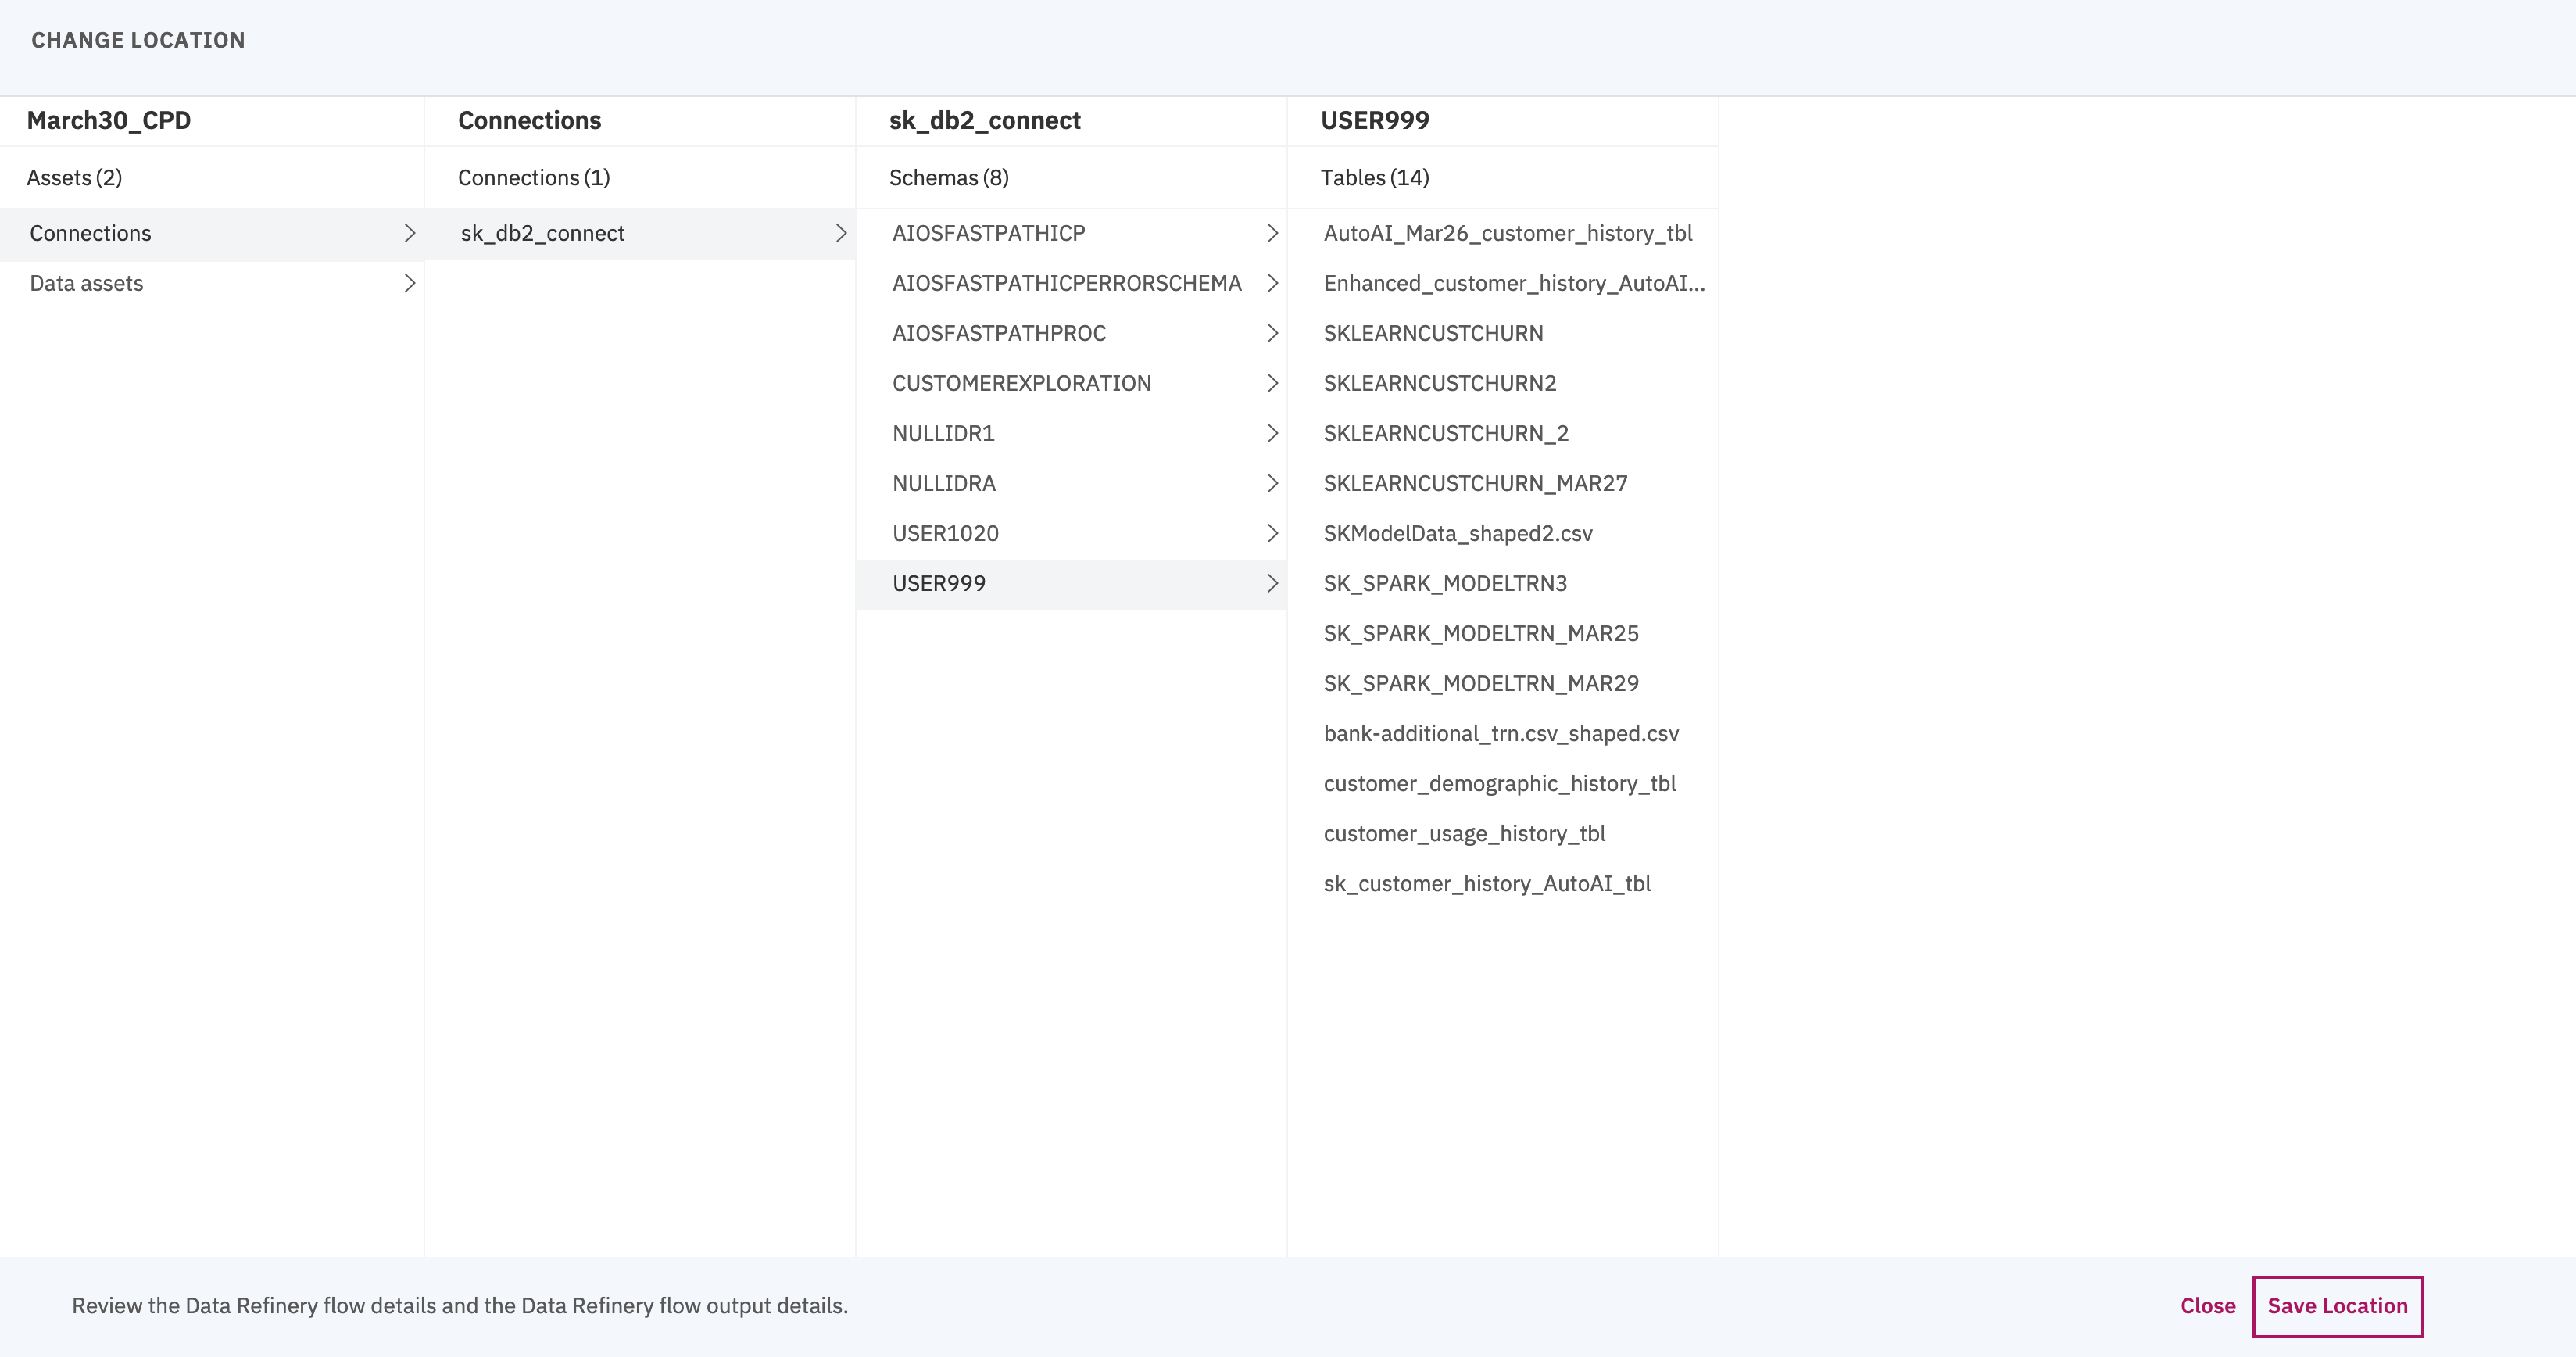

#### In this way, you can move the result of Refinery output to any other Datasource that can be defined as Connection. For example Cloud Object Store, Cloudant, Oracle, etc. 

<font color = 'red'> *Note: When you are using Cloud Object Store, please ensure that you first select any available file and then click on "Save Location". This will take you back to the previous screen, where you can change the name of the file based on your preferences </font>


#### After clicking on "Save Location", you should again Save and Create a job as shown above to complete the step. Now our data has been saved to DB2Wh table because Open Scale needs training data to be stored in DB2. This completes our Data refinery step. Now we can move to model development process using AutoAI.

#### After this step has been executed, close the Notebook and comeback to the Overview Notebook.